In [1]:
import os
import natsort
from glob import glob
import pandas as pd
import numpy as np
import warnings
import io
import csv
import statistics
from pandas.core.frame import DataFrame
from scipy import io
from scipy.interpolate import splrep, splev
from scipy.stats import skew, kurtosis
from scipy import signal, fftpack
from sys import platform
import xgboost as xgb
from xgboost import *
import lightgbm as lgb
from lightgbm import *
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, QuantileTransformer
from sklearn.metrics import *
from sklearn.metrics import mean_squared_error
from sklearn.svm import LinearSVC, SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import *
from sklearn.ensemble import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import *
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import classification_report
from sklearn.feature_selection import VarianceThreshold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from lightgbm import LGBMClassifier
from lightgbm import LGBMRegressor
import math
import shap
import tensorflow as tf
import keras.backend as K 
from keras.layers import Dense, LSTM, GRU, SimpleRNN, RNN, Conv1D, Conv2D, Conv3D
from keras.layers import Input, Dropout, Flatten, BatchNormalization, LayerNormalization
from keras.layers import Embedding, Bidirectional
from keras.models import Sequential
from keras import regularizers
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from keras.optimizers import Adam, SGD, RMSprop
from keras.constraints import MaxNorm
from keras.metrics import mean_absolute_percentage_error, RootMeanSquaredError
from keras.utils import plot_model
from keras.utils import model_to_dot

In [2]:
data_12800 = 'all_condition_stat_12800_filtered_max.csv'

In [3]:
data = pd.read_csv('./data/'+data_12800)
data

,RMS_CF_max,RMS_ACC_mean,RMS_ACC_std,RMS_ACC_median,RMS_ACC_min,RMS_ACC_max,RMS_ACC_skew,RMS_ACC_kurt,RMS_SPINDLE_V_mean,RMS_SPINDLE_V_std,...,SOUND_median,SOUND_min,SOUND_max,SOUND_skew,SOUND_kurt,Ae,Ap,rpm,feed,Milling_Type
0,68.163329,0.245427,0.271667,0.157905,0.001419,1.941071,2.825262,9.431775,74.608110,51.078552,...,0.004706,-0.518381,0.492327,-0.101884,-0.084553,1,1.0,3000,300,down
1,67.874475,0.228561,0.256883,0.148731,0.000569,1.841374,3.073146,11.427321,73.197898,50.566549,...,0.002291,-0.450551,0.498996,0.080216,-0.211029,1,1.0,3000,300,down
2,69.284793,0.231981,0.257158,0.153119,0.001430,1.935348,3.078326,11.477200,73.187227,50.567539,...,0.002904,-0.709097,0.817550,-0.029898,0.266027,1,1.0,3000,300,down
3,69.473656,0.231002,0.255456,0.152957,0.001585,1.852523,3.057163,11.327835,73.155798,50.966931,...,0.002248,-0.496731,0.509122,0.051436,-0.170695,1,1.0,3000,300,down
4,68.602052,0.228895,0.255323,0.150978,0.001553,1.942390,3.071897,11.429692,74.284101,51.089732,...,-0.004157,-0.467897,0.517642,0.060738,-0.246327,1,1.0,3000,300,down
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3561,583.231211,3.575957,2.872385,2.802993,0.030818,24.041893,1.967909,5.678236,50.651660,41.327268,...,0.027200,-4.553875,4.258986,-0.195173,-0.025525,4,6.0,5000,450,up
3562,580.421189,3.143293,2.918746,2.238513,0.010163,23.272022,2.152586,6.442916,54.398373,43.387011,...,0.032404,-4.331138,3.992545,-0.186024,0.438358,4,6.0,5000,450,up
3563,604.216465,3.415435,2.680779,2.670480,0.002692,20.326331,1.737523,4.027836,53.139158,42.652204,...,-0.054790,-4.232807,4.408266,0.124733,-0.246908,4,6.0,5000,500,up
3564,602.037207,3.527300,2.891382,2.728853,0.015913,22.578368,1.957310,5.237861,53.070980,42.595514,...,-0.041764,-4.056287,4.755409,0.231296,-0.233711,4,6.0,5000,500,up


In [4]:
groups_type = data.groupby('Milling_Type')

down = groups_type.get_group('down')
down = down.reset_index(drop=True)

up = groups_type.get_group('up')
up = up.reset_index(drop=True)

In [5]:
groups_rpm = down.groupby('rpm')

In [6]:
rpm_3000 = groups_rpm.get_group(3000)
rpm_3000 = rpm_3000.reset_index(drop=True)
rpm_3000 = rpm_3000.drop(['Milling_Type'], axis=1)

rpm_3500 = groups_rpm.get_group(3500)
rpm_3500 = rpm_3500.reset_index(drop=True)
rpm_3500 = rpm_3500.drop(['Milling_Type'], axis=1)

rpm_4000 = groups_rpm.get_group(4000)
rpm_4000 = rpm_4000.reset_index(drop=True)
rpm_4000 = rpm_4000.drop(['Milling_Type'], axis=1)

rpm_4500 = groups_rpm.get_group(4500)
rpm_4500 = rpm_4500.reset_index(drop=True)
rpm_4500 = rpm_4500.drop(['Milling_Type'], axis=1)

rpm_5000 = groups_rpm.get_group(5000)
rpm_5000 = rpm_5000.reset_index(drop=True)
rpm_5000 = rpm_5000.drop(['Milling_Type'], axis=1)

In [7]:
rpm_3000

,RMS_CF_max,RMS_ACC_mean,RMS_ACC_std,RMS_ACC_median,RMS_ACC_min,RMS_ACC_max,RMS_ACC_skew,RMS_ACC_kurt,RMS_SPINDLE_V_mean,RMS_SPINDLE_V_std,...,SOUND_std,SOUND_median,SOUND_min,SOUND_max,SOUND_skew,SOUND_kurt,Ae,Ap,rpm,feed
0,68.163329,0.245427,0.271667,0.157905,0.001419,1.941071,2.825262,9.431775,74.608110,51.078552,...,0.145759,0.004706,-0.518381,0.492327,-0.101884,-0.084553,1,1.0,3000,300
1,67.874475,0.228561,0.256883,0.148731,0.000569,1.841374,3.073146,11.427321,73.197898,50.566549,...,0.142357,0.002291,-0.450551,0.498996,0.080216,-0.211029,1,1.0,3000,300
2,69.284793,0.231981,0.257158,0.153119,0.001430,1.935348,3.078326,11.477200,73.187227,50.567539,...,0.179684,0.002904,-0.709097,0.817550,-0.029898,0.266027,1,1.0,3000,300
3,69.473656,0.231002,0.255456,0.152957,0.001585,1.852523,3.057163,11.327835,73.155798,50.966931,...,0.148164,0.002248,-0.496731,0.509122,0.051436,-0.170695,1,1.0,3000,300
4,68.602052,0.228895,0.255323,0.150978,0.001553,1.942390,3.071897,11.429692,74.284101,51.089732,...,0.145978,-0.004157,-0.467897,0.517642,0.060738,-0.246327,1,1.0,3000,300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,601.175753,0.540202,0.396622,0.443581,0.002109,2.809375,1.666883,4.001745,64.590433,47.528904,...,1.590457,-0.257212,-3.389835,2.916393,0.028645,-1.005622,4,6.0,3000,450
358,600.744821,0.649947,0.597039,0.487430,0.001693,8.423820,3.533827,25.233452,67.124740,48.437205,...,1.382492,-0.122135,-3.557504,2.855943,-0.005609,-0.568638,4,6.0,3000,450
359,637.919043,0.575907,0.428289,0.468486,0.005040,2.895683,1.637213,3.564878,64.317710,47.475010,...,1.634091,-0.251162,-3.729071,3.177942,0.022638,-0.975539,4,6.0,3000,500
360,630.925932,0.566587,0.422524,0.464765,0.002721,2.865758,1.660833,3.710346,65.256332,47.746405,...,1.646641,-0.334727,-3.786334,3.185727,0.048802,-1.030664,4,6.0,3000,500


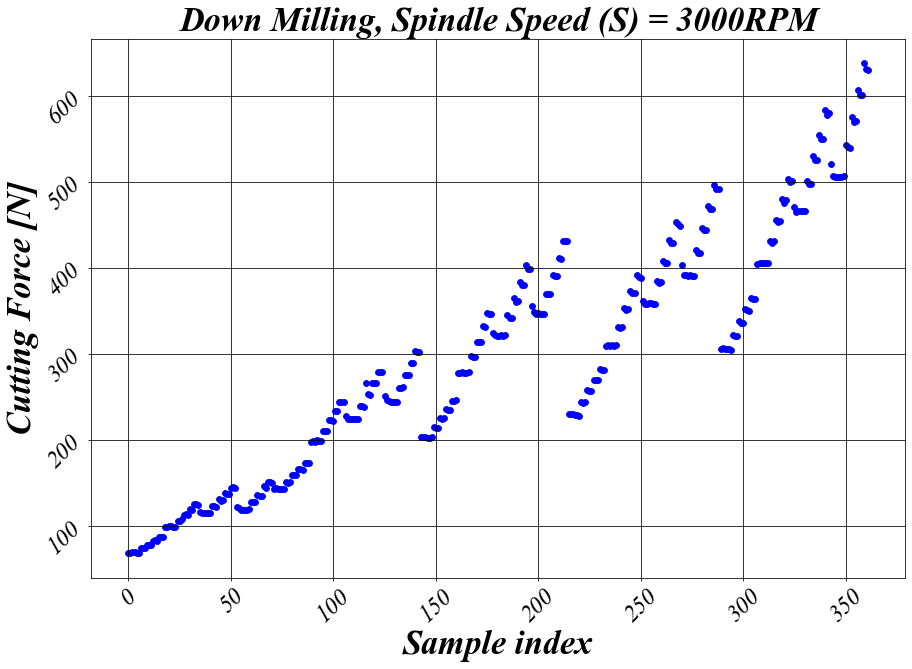

In [8]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Down Milling, Spindle Speed (S) = 3000RPM',**tfont)
plt.scatter(range(0, len(rpm_3000['RMS_CF_max'])), rpm_3000['RMS_CF_max'], label='RMS Fxyz MAX', color = 'blue')
#plt.ylim((50,350))
#plt.scatter(range(0, len(LGBM_test_pred)), LGBM_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid(color = 'black')
#plt.legend(fontsize = 35)
plt.show()
#fig.savefig("Down Milling, Cutting Depth (Ap) = 1.00mm.png")

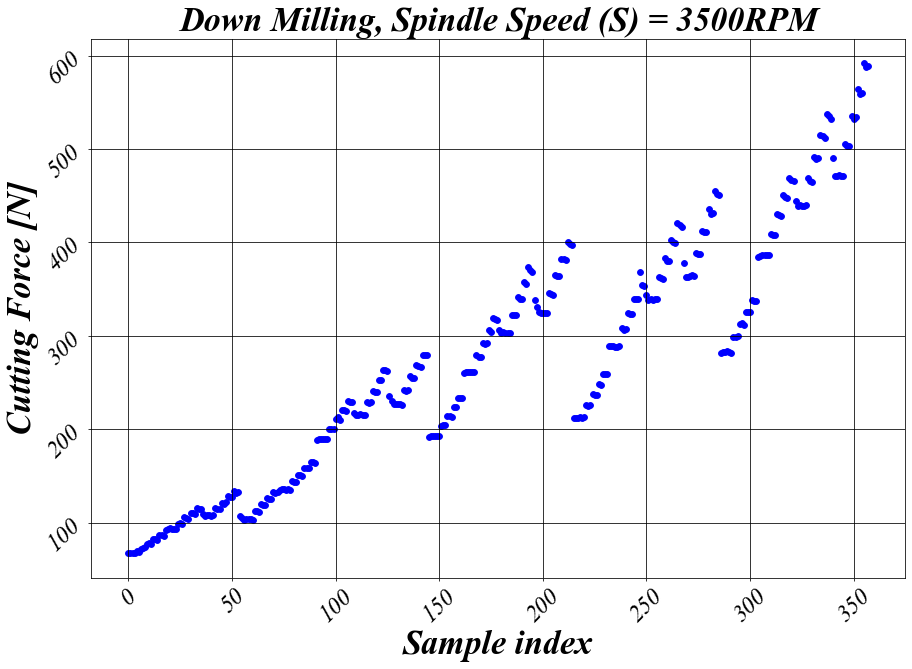

In [9]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Down Milling, Spindle Speed (S) = 3500RPM',**tfont)
plt.scatter(range(0, len(rpm_3500['RMS_CF_max'])), rpm_3500['RMS_CF_max'], label='RMS Fxyz MAX', color = 'blue')
#plt.ylim((50,350))
#plt.scatter(range(0, len(LGBM_test_pred)), LGBM_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid(color = 'black')
#plt.legend(fontsize = 35)
plt.show()
#fig.savefig("Down Milling, Cutting Depth (Ap) = 1.00mm.png")

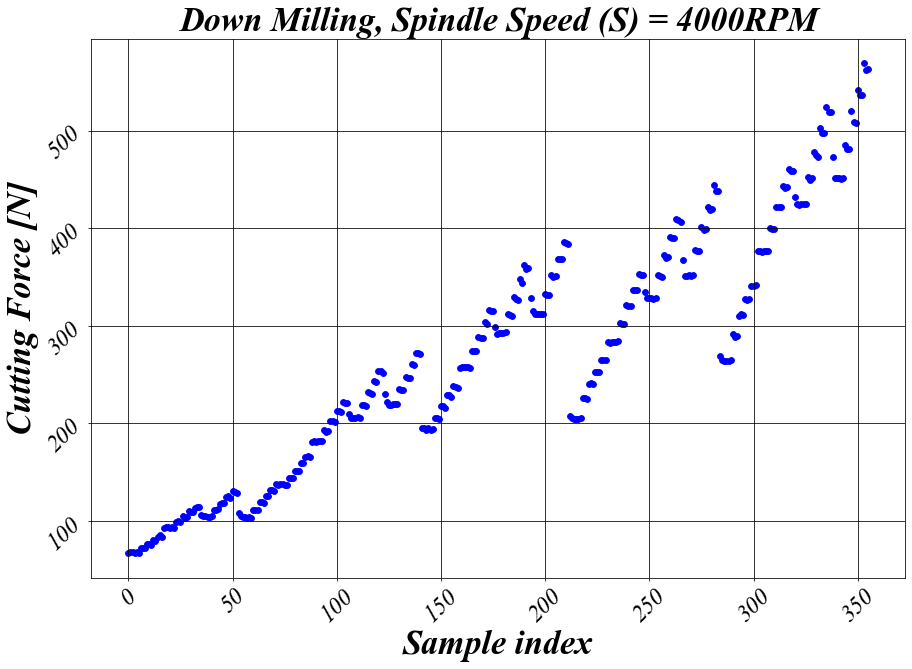

In [10]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Down Milling, Spindle Speed (S) = 4000RPM',**tfont)
plt.scatter(range(0, len(rpm_4000['RMS_CF_max'])), rpm_4000['RMS_CF_max'], label='RMS Fxyz MAX', color = 'blue')
#plt.ylim((50,350))
#plt.scatter(range(0, len(LGBM_test_pred)), LGBM_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid(color = 'black')
#plt.legend(fontsize = 35)
plt.show()
#fig.savefig("Down Milling, Cutting Depth (Ap) = 1.00mm.png")

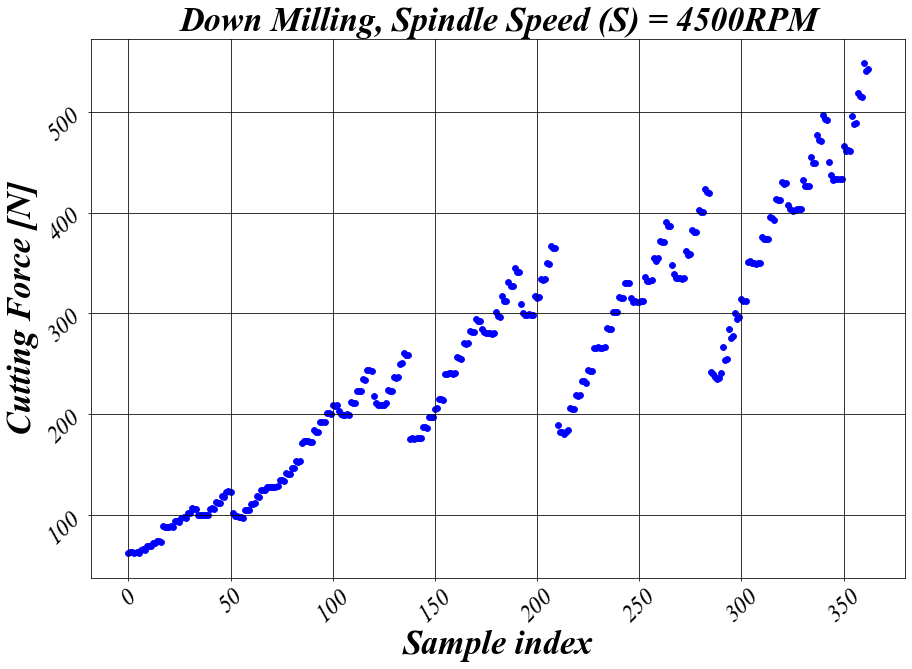

In [11]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Down Milling, Spindle Speed (S) = 4500RPM',**tfont)
plt.scatter(range(0, len(rpm_4500['RMS_CF_max'])), rpm_4500['RMS_CF_max'], label='RMS Fxyz MAX', color = 'blue')
#plt.ylim((50,350))
#plt.scatter(range(0, len(LGBM_test_pred)), LGBM_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid(color = 'black')
#plt.legend(fontsize = 35)
plt.show()
#fig.savefig("Down Milling, Cutting Depth (Ap) = 1.00mm.png")

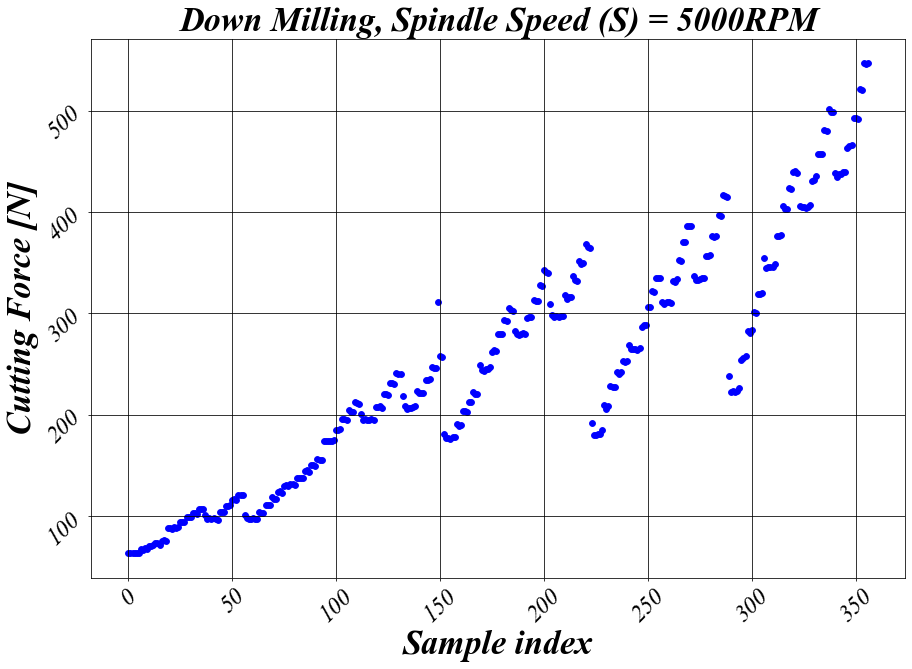

In [12]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Down Milling, Spindle Speed (S) = 5000RPM',**tfont)
plt.scatter(range(0, len(rpm_5000['RMS_CF_max'])), rpm_5000['RMS_CF_max'], label='RMS Fxyz MAX', color = 'blue')
#plt.ylim((50,350))
#plt.scatter(range(0, len(LGBM_test_pred)), LGBM_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid(color = 'black')
#plt.legend(fontsize = 35)
plt.show()
#fig.savefig("Down Milling, Cutting Depth (Ap) = 1.00mm.png")

# ***RPM 3000 test***

In [13]:
train = pd.concat([rpm_3500, rpm_4000, rpm_4500, rpm_5000], axis  = 0)
train = train.reset_index(drop=True)
X_train = train.iloc[: , 1:]
y_train = train['RMS_CF_max']

In [14]:
X_test = rpm_3000.iloc[: , 1:]
y_test = rpm_3000['RMS_CF_max']

In [15]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [16]:
xgb = XGBRegressor(learning_rate = 0.01,
                   n_estimators = 1000,
                   n_jobs  = -1,random_state=42)

eval_set = [(X_train_scaled, y_train), (X_test_scaled, y_test)] # 학습에 사용한 데이터셋과 검증에 사용한 데이터셋

xgb.fit(X_train_scaled, y_train,eval_set=eval_set, eval_metric=['rmse', 'mape'])

[0]	validation_0-rmse:285.85861	validation_0-mape:0.98751	validation_1-rmse:322.77091	validation_1-mape:0.99158
[1]	validation_0-rmse:283.05493	validation_0-mape:0.97765	validation_1-rmse:320.75513	validation_1-mape:0.98548
[2]	validation_0-rmse:280.27923	validation_0-mape:0.96791	validation_1-rmse:318.76075	validation_1-mape:0.97944
[3]	validation_0-rmse:277.53125	validation_0-mape:0.95826	validation_1-rmse:316.78760	validation_1-mape:0.97346
[4]	validation_0-rmse:274.81071	validation_0-mape:0.94871	validation_1-rmse:314.83539	validation_1-mape:0.96754
[5]	validation_0-rmse:272.11734	validation_0-mape:0.93925	validation_1-rmse:312.90396	validation_1-mape:0.96168
[6]	validation_0-rmse:269.45084	validation_0-mape:0.92988	validation_1-rmse:310.99471	validation_1-mape:0.95588
[7]	validation_0-rmse:266.81147	validation_0-mape:0.92058	validation_1-rmse:309.09849	validation_1-mape:0.95012
[8]	validation_0-rmse:264.19797	validation_0-mape:0.91140	validation_1-rmse:307.21160	validation_1-mape:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


[18]	validation_0-rmse:239.44458	validation_0-mape:0.82429	validation_1-rmse:289.34224	validation_1-mape:0.88916
[19]	validation_0-rmse:237.10149	validation_0-mape:0.81605	validation_1-rmse:287.45594	validation_1-mape:0.88351
[20]	validation_0-rmse:234.78390	validation_0-mape:0.80791	validation_1-rmse:285.97982	validation_1-mape:0.87867
[21]	validation_0-rmse:232.48723	validation_0-mape:0.79983	validation_1-rmse:284.12713	validation_1-mape:0.87311
[22]	validation_0-rmse:230.21351	validation_0-mape:0.79183	validation_1-rmse:282.33339	validation_1-mape:0.86776
[23]	validation_0-rmse:227.96451	validation_0-mape:0.78393	validation_1-rmse:280.90396	validation_1-mape:0.86307
[24]	validation_0-rmse:225.73582	validation_0-mape:0.77609	validation_1-rmse:279.26098	validation_1-mape:0.85807
[25]	validation_0-rmse:223.52904	validation_0-mape:0.76833	validation_1-rmse:277.48513	validation_1-mape:0.85274
[26]	validation_0-rmse:221.34412	validation_0-mape:0.76065	validation_1-rmse:275.75582	validatio

[91]	validation_0-rmse:117.39588	validation_0-mape:0.39612	validation_1-rmse:202.85058	validation_1-mape:0.61324
[92]	validation_0-rmse:116.26499	validation_0-mape:0.39217	validation_1-rmse:202.11263	validation_1-mape:0.61086
[93]	validation_0-rmse:115.14345	validation_0-mape:0.38826	validation_1-rmse:201.23812	validation_1-mape:0.60810
[94]	validation_0-rmse:114.03340	validation_0-mape:0.38440	validation_1-rmse:200.46524	validation_1-mape:0.60561
[95]	validation_0-rmse:112.93503	validation_0-mape:0.38055	validation_1-rmse:199.73012	validation_1-mape:0.60318
[96]	validation_0-rmse:111.84858	validation_0-mape:0.37676	validation_1-rmse:198.96227	validation_1-mape:0.60058
[97]	validation_0-rmse:110.77114	validation_0-mape:0.37301	validation_1-rmse:198.18452	validation_1-mape:0.59817
[98]	validation_0-rmse:109.70569	validation_0-mape:0.36929	validation_1-rmse:197.48787	validation_1-mape:0.59592
[99]	validation_0-rmse:108.64800	validation_0-mape:0.36562	validation_1-rmse:196.82417	validatio

[164]	validation_0-rmse:58.29079	validation_0-mape:0.19097	validation_1-rmse:159.73715	validation_1-mape:0.47465
[165]	validation_0-rmse:57.74047	validation_0-mape:0.18908	validation_1-rmse:159.34739	validation_1-mape:0.47340
[166]	validation_0-rmse:57.19737	validation_0-mape:0.18720	validation_1-rmse:158.96381	validation_1-mape:0.47216
[167]	validation_0-rmse:56.65803	validation_0-mape:0.18535	validation_1-rmse:158.57622	validation_1-mape:0.47090
[168]	validation_0-rmse:56.12415	validation_0-mape:0.18351	validation_1-rmse:158.19728	validation_1-mape:0.46967
[169]	validation_0-rmse:55.59725	validation_0-mape:0.18169	validation_1-rmse:157.83579	validation_1-mape:0.46851
[170]	validation_0-rmse:55.07415	validation_0-mape:0.17989	validation_1-rmse:157.36050	validation_1-mape:0.46712
[171]	validation_0-rmse:54.55595	validation_0-mape:0.17811	validation_1-rmse:156.97511	validation_1-mape:0.46591
[172]	validation_0-rmse:54.04322	validation_0-mape:0.17635	validation_1-rmse:156.51128	validatio

[237]	validation_0-rmse:29.58574	validation_0-mape:0.09242	validation_1-rmse:138.73518	validation_1-mape:0.40586
[238]	validation_0-rmse:29.31748	validation_0-mape:0.09151	validation_1-rmse:138.54084	validation_1-mape:0.40523
[239]	validation_0-rmse:29.05237	validation_0-mape:0.09061	validation_1-rmse:138.34469	validation_1-mape:0.40457
[240]	validation_0-rmse:28.79114	validation_0-mape:0.08972	validation_1-rmse:138.16879	validation_1-mape:0.40397
[241]	validation_0-rmse:28.53241	validation_0-mape:0.08884	validation_1-rmse:137.99388	validation_1-mape:0.40331
[242]	validation_0-rmse:28.27464	validation_0-mape:0.08796	validation_1-rmse:137.80716	validation_1-mape:0.40271
[243]	validation_0-rmse:28.02027	validation_0-mape:0.08710	validation_1-rmse:137.69601	validation_1-mape:0.40223
[244]	validation_0-rmse:27.76899	validation_0-mape:0.08624	validation_1-rmse:137.52158	validation_1-mape:0.40160
[245]	validation_0-rmse:27.51866	validation_0-mape:0.08538	validation_1-rmse:137.40047	validatio

[310]	validation_0-rmse:15.65980	validation_0-mape:0.04502	validation_1-rmse:130.00559	validation_1-mape:0.37415
[311]	validation_0-rmse:15.53150	validation_0-mape:0.04459	validation_1-rmse:129.91658	validation_1-mape:0.37382
[312]	validation_0-rmse:15.40159	validation_0-mape:0.04416	validation_1-rmse:129.85419	validation_1-mape:0.37353
[313]	validation_0-rmse:15.27490	validation_0-mape:0.04374	validation_1-rmse:129.74692	validation_1-mape:0.37317
[314]	validation_0-rmse:15.14777	validation_0-mape:0.04332	validation_1-rmse:129.69372	validation_1-mape:0.37293
[315]	validation_0-rmse:15.02326	validation_0-mape:0.04291	validation_1-rmse:129.59333	validation_1-mape:0.37259
[316]	validation_0-rmse:14.90025	validation_0-mape:0.04250	validation_1-rmse:129.50888	validation_1-mape:0.37231
[317]	validation_0-rmse:14.77797	validation_0-mape:0.04209	validation_1-rmse:129.42335	validation_1-mape:0.37198
[318]	validation_0-rmse:14.65656	validation_0-mape:0.04169	validation_1-rmse:129.35717	validatio

[383]	validation_0-rmse:8.93410	validation_0-mape:0.02348	validation_1-rmse:125.60374	validation_1-mape:0.35765
[384]	validation_0-rmse:8.87294	validation_0-mape:0.02329	validation_1-rmse:125.56798	validation_1-mape:0.35750
[385]	validation_0-rmse:8.80960	validation_0-mape:0.02311	validation_1-rmse:125.53083	validation_1-mape:0.35737
[386]	validation_0-rmse:8.74676	validation_0-mape:0.02292	validation_1-rmse:125.49404	validation_1-mape:0.35723
[387]	validation_0-rmse:8.68500	validation_0-mape:0.02273	validation_1-rmse:125.46154	validation_1-mape:0.35711
[388]	validation_0-rmse:8.62722	validation_0-mape:0.02256	validation_1-rmse:125.42666	validation_1-mape:0.35697
[389]	validation_0-rmse:8.56637	validation_0-mape:0.02237	validation_1-rmse:125.39218	validation_1-mape:0.35684
[390]	validation_0-rmse:8.50648	validation_0-mape:0.02220	validation_1-rmse:125.35759	validation_1-mape:0.35670
[391]	validation_0-rmse:8.45015	validation_0-mape:0.02203	validation_1-rmse:125.32521	validation_1-mape:

[457]	validation_0-rmse:5.75994	validation_0-mape:0.01469	validation_1-rmse:122.83091	validation_1-mape:0.34685
[458]	validation_0-rmse:5.72806	validation_0-mape:0.01461	validation_1-rmse:122.80161	validation_1-mape:0.34666
[459]	validation_0-rmse:5.70078	validation_0-mape:0.01455	validation_1-rmse:122.77327	validation_1-mape:0.34655
[460]	validation_0-rmse:5.67359	validation_0-mape:0.01449	validation_1-rmse:122.74905	validation_1-mape:0.34646
[461]	validation_0-rmse:5.64716	validation_0-mape:0.01443	validation_1-rmse:122.72603	validation_1-mape:0.34638
[462]	validation_0-rmse:5.62012	validation_0-mape:0.01437	validation_1-rmse:122.70226	validation_1-mape:0.34629
[463]	validation_0-rmse:5.59437	validation_0-mape:0.01431	validation_1-rmse:122.68013	validation_1-mape:0.34621
[464]	validation_0-rmse:5.56636	validation_0-mape:0.01424	validation_1-rmse:122.63584	validation_1-mape:0.34609
[465]	validation_0-rmse:5.53670	validation_0-mape:0.01418	validation_1-rmse:122.61968	validation_1-mape:

[531]	validation_0-rmse:4.18099	validation_0-mape:0.01120	validation_1-rmse:121.24430	validation_1-mape:0.34145
[532]	validation_0-rmse:4.16622	validation_0-mape:0.01117	validation_1-rmse:121.21585	validation_1-mape:0.34138
[533]	validation_0-rmse:4.15106	validation_0-mape:0.01114	validation_1-rmse:121.19759	validation_1-mape:0.34132
[534]	validation_0-rmse:4.13538	validation_0-mape:0.01110	validation_1-rmse:121.17378	validation_1-mape:0.34124
[535]	validation_0-rmse:4.12048	validation_0-mape:0.01107	validation_1-rmse:121.15760	validation_1-mape:0.34119
[536]	validation_0-rmse:4.10231	validation_0-mape:0.01103	validation_1-rmse:121.14600	validation_1-mape:0.34115
[537]	validation_0-rmse:4.08445	validation_0-mape:0.01100	validation_1-rmse:121.13566	validation_1-mape:0.34111
[538]	validation_0-rmse:4.06938	validation_0-mape:0.01097	validation_1-rmse:121.11451	validation_1-mape:0.34103
[539]	validation_0-rmse:4.05190	validation_0-mape:0.01093	validation_1-rmse:121.10340	validation_1-mape:

[605]	validation_0-rmse:3.35118	validation_0-mape:0.00955	validation_1-rmse:119.99922	validation_1-mape:0.33751
[606]	validation_0-rmse:3.34187	validation_0-mape:0.00953	validation_1-rmse:119.98290	validation_1-mape:0.33746
[607]	validation_0-rmse:3.33634	validation_0-mape:0.00953	validation_1-rmse:119.96975	validation_1-mape:0.33741
[608]	validation_0-rmse:3.32697	validation_0-mape:0.00951	validation_1-rmse:119.95141	validation_1-mape:0.33735
[609]	validation_0-rmse:3.32150	validation_0-mape:0.00950	validation_1-rmse:119.93914	validation_1-mape:0.33730
[610]	validation_0-rmse:3.31442	validation_0-mape:0.00948	validation_1-rmse:119.91825	validation_1-mape:0.33726
[611]	validation_0-rmse:3.30529	validation_0-mape:0.00947	validation_1-rmse:119.90181	validation_1-mape:0.33721
[612]	validation_0-rmse:3.30004	validation_0-mape:0.00946	validation_1-rmse:119.89053	validation_1-mape:0.33716
[613]	validation_0-rmse:3.29079	validation_0-mape:0.00944	validation_1-rmse:119.88465	validation_1-mape:

[679]	validation_0-rmse:2.84744	validation_0-mape:0.00853	validation_1-rmse:119.32941	validation_1-mape:0.33523
[680]	validation_0-rmse:2.84326	validation_0-mape:0.00852	validation_1-rmse:119.32697	validation_1-mape:0.33522
[681]	validation_0-rmse:2.83470	validation_0-mape:0.00850	validation_1-rmse:119.32582	validation_1-mape:0.33521
[682]	validation_0-rmse:2.83197	validation_0-mape:0.00849	validation_1-rmse:119.31701	validation_1-mape:0.33517
[683]	validation_0-rmse:2.82597	validation_0-mape:0.00848	validation_1-rmse:119.31244	validation_1-mape:0.33516
[684]	validation_0-rmse:2.82176	validation_0-mape:0.00847	validation_1-rmse:119.31008	validation_1-mape:0.33515
[685]	validation_0-rmse:2.81332	validation_0-mape:0.00845	validation_1-rmse:119.30726	validation_1-mape:0.33513
[686]	validation_0-rmse:2.81067	validation_0-mape:0.00845	validation_1-rmse:119.29865	validation_1-mape:0.33510
[687]	validation_0-rmse:2.80653	validation_0-mape:0.00844	validation_1-rmse:119.28830	validation_1-mape:

[753]	validation_0-rmse:2.51257	validation_0-mape:0.00773	validation_1-rmse:119.01745	validation_1-mape:0.33405
[754]	validation_0-rmse:2.51069	validation_0-mape:0.00772	validation_1-rmse:119.01391	validation_1-mape:0.33404
[755]	validation_0-rmse:2.50497	validation_0-mape:0.00771	validation_1-rmse:119.00971	validation_1-mape:0.33403
[756]	validation_0-rmse:2.50098	validation_0-mape:0.00770	validation_1-rmse:119.00532	validation_1-mape:0.33402
[757]	validation_0-rmse:2.49957	validation_0-mape:0.00770	validation_1-rmse:119.00514	validation_1-mape:0.33402
[758]	validation_0-rmse:2.49768	validation_0-mape:0.00769	validation_1-rmse:119.00256	validation_1-mape:0.33401
[759]	validation_0-rmse:2.49207	validation_0-mape:0.00768	validation_1-rmse:119.00001	validation_1-mape:0.33401
[760]	validation_0-rmse:2.48805	validation_0-mape:0.00767	validation_1-rmse:118.99800	validation_1-mape:0.33400
[761]	validation_0-rmse:2.48447	validation_0-mape:0.00766	validation_1-rmse:118.99495	validation_1-mape:

[827]	validation_0-rmse:2.25846	validation_0-mape:0.00708	validation_1-rmse:118.76145	validation_1-mape:0.33275
[828]	validation_0-rmse:2.25608	validation_0-mape:0.00707	validation_1-rmse:118.76107	validation_1-mape:0.33274
[829]	validation_0-rmse:2.25286	validation_0-mape:0.00706	validation_1-rmse:118.75928	validation_1-mape:0.33274
[830]	validation_0-rmse:2.25026	validation_0-mape:0.00705	validation_1-rmse:118.75094	validation_1-mape:0.33272
[831]	validation_0-rmse:2.24513	validation_0-mape:0.00704	validation_1-rmse:118.75097	validation_1-mape:0.33272
[832]	validation_0-rmse:2.24450	validation_0-mape:0.00704	validation_1-rmse:118.73910	validation_1-mape:0.33263
[833]	validation_0-rmse:2.24163	validation_0-mape:0.00703	validation_1-rmse:118.73733	validation_1-mape:0.33263
[834]	validation_0-rmse:2.24100	validation_0-mape:0.00703	validation_1-rmse:118.72523	validation_1-mape:0.33253
[835]	validation_0-rmse:2.23863	validation_0-mape:0.00702	validation_1-rmse:118.72482	validation_1-mape:

[901]	validation_0-rmse:2.06747	validation_0-mape:0.00654	validation_1-rmse:118.39289	validation_1-mape:0.33033
[902]	validation_0-rmse:2.06605	validation_0-mape:0.00654	validation_1-rmse:118.38339	validation_1-mape:0.33025
[903]	validation_0-rmse:2.06446	validation_0-mape:0.00653	validation_1-rmse:118.38164	validation_1-mape:0.33026
[904]	validation_0-rmse:2.06307	validation_0-mape:0.00653	validation_1-rmse:118.37206	validation_1-mape:0.33018
[905]	validation_0-rmse:2.05928	validation_0-mape:0.00652	validation_1-rmse:118.37192	validation_1-mape:0.33019
[906]	validation_0-rmse:2.05766	validation_0-mape:0.00651	validation_1-rmse:118.37216	validation_1-mape:0.33019
[907]	validation_0-rmse:2.05631	validation_0-mape:0.00651	validation_1-rmse:118.36434	validation_1-mape:0.33012
[908]	validation_0-rmse:2.05505	validation_0-mape:0.00651	validation_1-rmse:118.35460	validation_1-mape:0.33004
[909]	validation_0-rmse:2.05287	validation_0-mape:0.00650	validation_1-rmse:118.35386	validation_1-mape:

[975]	validation_0-rmse:1.92306	validation_0-mape:0.00616	validation_1-rmse:118.17259	validation_1-mape:0.32869
[976]	validation_0-rmse:1.92190	validation_0-mape:0.00616	validation_1-rmse:118.16647	validation_1-mape:0.32863
[977]	validation_0-rmse:1.91887	validation_0-mape:0.00615	validation_1-rmse:118.16535	validation_1-mape:0.32863
[978]	validation_0-rmse:1.91583	validation_0-mape:0.00615	validation_1-rmse:118.16533	validation_1-mape:0.32864
[979]	validation_0-rmse:1.91335	validation_0-mape:0.00614	validation_1-rmse:118.16492	validation_1-mape:0.32864
[980]	validation_0-rmse:1.91198	validation_0-mape:0.00614	validation_1-rmse:118.16461	validation_1-mape:0.32864
[981]	validation_0-rmse:1.91070	validation_0-mape:0.00613	validation_1-rmse:118.15838	validation_1-mape:0.32858
[982]	validation_0-rmse:1.90736	validation_0-mape:0.00612	validation_1-rmse:118.15772	validation_1-mape:0.32859
[983]	validation_0-rmse:1.90546	validation_0-mape:0.00612	validation_1-rmse:118.15761	validation_1-mape:

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [17]:
XGB_train_pred = xgb.predict(X_train_scaled)
XGB_test_pred = xgb.predict(X_test_scaled)

print('Train RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_train, XGB_train_pred))))
print('Train MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_train, XGB_train_pred)))

print('Test RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_test, XGB_test_pred))))
print('Test MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_test, XGB_test_pred)))

Train RMSE: 1.8760
Train MAPE: 0.6048
Test RMSE: 118.1186
Test MAPE: 32.8265


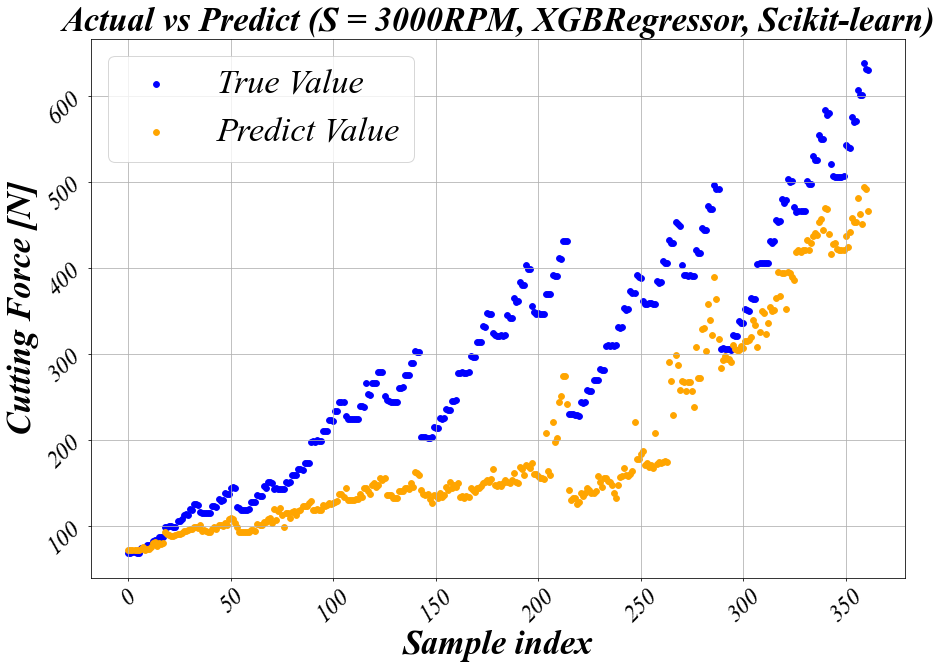

In [18]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Actual vs Predict (S = 3000RPM, XGBRegressor, Scikit-learn)',**tfont)
plt.scatter(range(0, len(y_test)), y_test, label='True Value', color = 'blue')
#plt.ylim((0,300))
plt.scatter(range(0, len(XGB_test_pred)), XGB_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid()
plt.legend(fontsize = 35)
plt.show()
#fig.savefig("Bi-directional LSTM Prediction.svg")

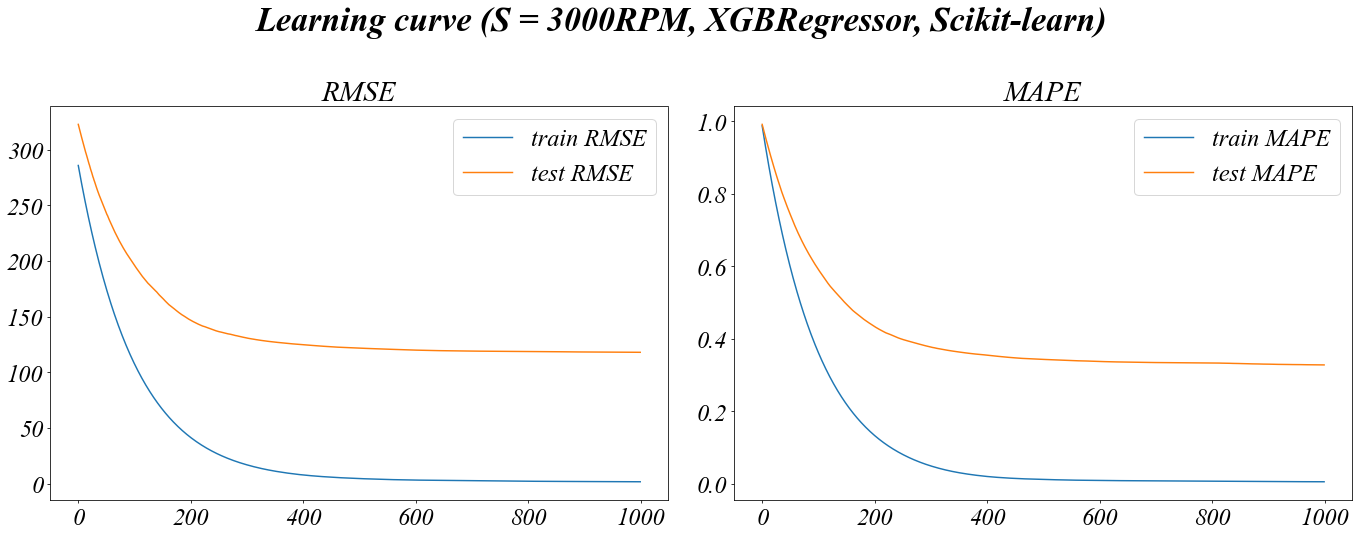

In [19]:
results = xgb.evals_result() # 학습 결과 가져오기


train_rmse = results['validation_0']['rmse']
test_rmse = results['validation_1']['rmse']

train_mape = results['validation_0']['mape']
test_mape = results['validation_1']['mape']

#학습곡선 그리기
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8),dpi=70)

ax[0].set_title("RMSE")
ax[1].set_title("MAPE")

ax[0].plot(train_rmse, label='train RMSE')
ax[0].plot(test_rmse, label='test RMSE')
ax[0].legend()

ax[1].plot(train_mape, label='train MAPE')
ax[1].plot(test_mape, label='test MAPE')
ax[1].legend()

fig.suptitle('Learning curve (S = 3000RPM, XGBRegressor, Scikit-learn)',**tfont)
fig.tight_layout() # 사용하면 플롯간 여백을 조정해준다. 
plt.show()
fig.savefig("./plot/Learning curve rpm 3000_12800.png")

# ***RPM 3500 test***

In [20]:
train = pd.concat([rpm_3000, rpm_4000, rpm_4500, rpm_5000], axis  = 0)
train = train.reset_index(drop=True)
X_train = train.iloc[: , 1:]
y_train = train['RMS_CF_max']

In [21]:
X_test = rpm_3500.iloc[: , 1:]
y_test = rpm_3500['RMS_CF_max']

In [22]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [23]:
xgb = XGBRegressor(learning_rate = 0.01,
                   n_estimators = 1000,
                   n_jobs  = -1,random_state=42)

eval_set = [(X_train_scaled, y_train), (X_test_scaled, y_test)] # 학습에 사용한 데이터셋과 검증에 사용한 데이터셋

xgb.fit(X_train_scaled, y_train,eval_set=eval_set, eval_metric=['rmse', 'mape'])

[0]	validation_0-rmse:291.93496	validation_0-mape:0.98753	validation_1-rmse:299.20651	validation_1-mape:0.98752
[1]	validation_0-rmse:289.07704	validation_0-mape:0.97766	validation_1-rmse:296.24935	validation_1-mape:0.97779
[2]	validation_0-rmse:286.24750	validation_0-mape:0.96787	validation_1-rmse:293.22692	validation_1-mape:0.96797
[3]	validation_0-rmse:283.44521	validation_0-mape:0.95819	validation_1-rmse:290.33022	validation_1-mape:0.95847
[4]	validation_0-rmse:280.67191	validation_0-mape:0.94860	validation_1-rmse:287.36784	validation_1-mape:0.94885
[5]	validation_0-rmse:277.92533	validation_0-mape:0.93911	validation_1-rmse:284.52881	validation_1-mape:0.93953
[6]	validation_0-rmse:275.20721	validation_0-mape:0.92970	validation_1-rmse:281.62514	validation_1-mape:0.93010
[7]	validation_0-rmse:272.51517	validation_0-mape:0.92040	validation_1-rmse:278.84007	validation_1-mape:0.92094
[8]	validation_0-rmse:269.85116	validation_0-mape:0.91118	validation_1-rmse:275.99094	validation_1-mape:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


[17]	validation_0-rmse:247.03638	validation_0-mape:0.83228	validation_1-rmse:252.11566	validation_1-mape:0.83338
[18]	validation_0-rmse:244.62678	validation_0-mape:0.82395	validation_1-rmse:249.70574	validation_1-mape:0.82523
[19]	validation_0-rmse:242.24144	validation_0-mape:0.81572	validation_1-rmse:247.23713	validation_1-mape:0.81703
[20]	validation_0-rmse:239.87958	validation_0-mape:0.80755	validation_1-rmse:244.67196	validation_1-mape:0.80877
[21]	validation_0-rmse:237.54063	validation_0-mape:0.79948	validation_1-rmse:242.34251	validation_1-mape:0.80095
[22]	validation_0-rmse:235.22608	validation_0-mape:0.79148	validation_1-rmse:239.94709	validation_1-mape:0.79299
[23]	validation_0-rmse:232.93416	validation_0-mape:0.78356	validation_1-rmse:237.44363	validation_1-mape:0.78489
[24]	validation_0-rmse:230.66467	validation_0-mape:0.77572	validation_1-rmse:235.18391	validation_1-mape:0.77728
[25]	validation_0-rmse:228.41862	validation_0-mape:0.76797	validation_1-rmse:232.92916	validatio

[90]	validation_0-rmse:121.36512	validation_0-mape:0.40013	validation_1-rmse:123.80131	validation_1-mape:0.39717
[91]	validation_0-rmse:120.19740	validation_0-mape:0.39614	validation_1-rmse:122.57741	validation_1-mape:0.39313
[92]	validation_0-rmse:119.04048	validation_0-mape:0.39220	validation_1-rmse:121.32976	validation_1-mape:0.38903
[93]	validation_0-rmse:117.89465	validation_0-mape:0.38831	validation_1-rmse:120.10521	validation_1-mape:0.38507
[94]	validation_0-rmse:116.76033	validation_0-mape:0.38444	validation_1-rmse:118.93056	validation_1-mape:0.38108
[95]	validation_0-rmse:115.63545	validation_0-mape:0.38061	validation_1-rmse:117.87149	validation_1-mape:0.37717
[96]	validation_0-rmse:114.52176	validation_0-mape:0.37682	validation_1-rmse:116.79741	validation_1-mape:0.37326
[97]	validation_0-rmse:113.42028	validation_0-mape:0.37308	validation_1-rmse:115.50587	validation_1-mape:0.36912
[98]	validation_0-rmse:112.32878	validation_0-mape:0.36936	validation_1-rmse:114.49480	validatio

[163]	validation_0-rmse:60.28559	validation_0-mape:0.19286	validation_1-rmse:60.04412	validation_1-mape:0.18017
[164]	validation_0-rmse:59.71664	validation_0-mape:0.19095	validation_1-rmse:59.41081	validation_1-mape:0.17805
[165]	validation_0-rmse:59.15335	validation_0-mape:0.18906	validation_1-rmse:58.75439	validation_1-mape:0.17580
[166]	validation_0-rmse:58.59573	validation_0-mape:0.18718	validation_1-rmse:58.17286	validation_1-mape:0.17386
[167]	validation_0-rmse:58.04380	validation_0-mape:0.18533	validation_1-rmse:57.54878	validation_1-mape:0.17173
[168]	validation_0-rmse:57.49750	validation_0-mape:0.18349	validation_1-rmse:57.03405	validation_1-mape:0.16994
[169]	validation_0-rmse:56.95616	validation_0-mape:0.18167	validation_1-rmse:56.42742	validation_1-mape:0.16787
[170]	validation_0-rmse:56.41983	validation_0-mape:0.17988	validation_1-rmse:55.88066	validation_1-mape:0.16611
[171]	validation_0-rmse:55.88926	validation_0-mape:0.17809	validation_1-rmse:55.26870	validation_1-mape:

[237]	validation_0-rmse:30.25312	validation_0-mape:0.09243	validation_1-rmse:31.28879	validation_1-mape:0.07879
[238]	validation_0-rmse:29.98047	validation_0-mape:0.09152	validation_1-rmse:31.07983	validation_1-mape:0.07822
[239]	validation_0-rmse:29.71107	validation_0-mape:0.09061	validation_1-rmse:30.86895	validation_1-mape:0.07761
[240]	validation_0-rmse:29.44332	validation_0-mape:0.08971	validation_1-rmse:30.67339	validation_1-mape:0.07702
[241]	validation_0-rmse:29.17802	validation_0-mape:0.08883	validation_1-rmse:30.47021	validation_1-mape:0.07646
[242]	validation_0-rmse:28.91470	validation_0-mape:0.08795	validation_1-rmse:30.27006	validation_1-mape:0.07590
[243]	validation_0-rmse:28.65500	validation_0-mape:0.08708	validation_1-rmse:30.08761	validation_1-mape:0.07538
[244]	validation_0-rmse:28.39671	validation_0-mape:0.08622	validation_1-rmse:29.89259	validation_1-mape:0.07483
[245]	validation_0-rmse:28.13731	validation_0-mape:0.08537	validation_1-rmse:29.67998	validation_1-mape:

[311]	validation_0-rmse:15.76932	validation_0-mape:0.04450	validation_1-rmse:23.62939	validation_1-mape:0.06079
[312]	validation_0-rmse:15.63741	validation_0-mape:0.04406	validation_1-rmse:23.59256	validation_1-mape:0.06074
[313]	validation_0-rmse:15.50817	validation_0-mape:0.04363	validation_1-rmse:23.53670	validation_1-mape:0.06065
[314]	validation_0-rmse:15.37986	validation_0-mape:0.04320	validation_1-rmse:23.49993	validation_1-mape:0.06061
[315]	validation_0-rmse:15.25092	validation_0-mape:0.04278	validation_1-rmse:23.46239	validation_1-mape:0.06058
[316]	validation_0-rmse:15.12478	validation_0-mape:0.04237	validation_1-rmse:23.47422	validation_1-mape:0.06067
[317]	validation_0-rmse:14.99948	validation_0-mape:0.04196	validation_1-rmse:23.44759	validation_1-mape:0.06064
[318]	validation_0-rmse:14.87431	validation_0-mape:0.04154	validation_1-rmse:23.41309	validation_1-mape:0.06061
[319]	validation_0-rmse:14.75038	validation_0-mape:0.04114	validation_1-rmse:23.37375	validation_1-mape:

[385]	validation_0-rmse:8.83418	validation_0-mape:0.02222	validation_1-rmse:22.50395	validation_1-mape:0.06120
[386]	validation_0-rmse:8.76937	validation_0-mape:0.02203	validation_1-rmse:22.50156	validation_1-mape:0.06122
[387]	validation_0-rmse:8.70817	validation_0-mape:0.02184	validation_1-rmse:22.49771	validation_1-mape:0.06124
[388]	validation_0-rmse:8.64805	validation_0-mape:0.02165	validation_1-rmse:22.51027	validation_1-mape:0.06131
[389]	validation_0-rmse:8.58696	validation_0-mape:0.02146	validation_1-rmse:22.50158	validation_1-mape:0.06132
[390]	validation_0-rmse:8.52779	validation_0-mape:0.02128	validation_1-rmse:22.51594	validation_1-mape:0.06138
[391]	validation_0-rmse:8.46754	validation_0-mape:0.02110	validation_1-rmse:22.53478	validation_1-mape:0.06146
[392]	validation_0-rmse:8.40968	validation_0-mape:0.02092	validation_1-rmse:22.54699	validation_1-mape:0.06152
[393]	validation_0-rmse:8.35120	validation_0-mape:0.02075	validation_1-rmse:22.54177	validation_1-mape:0.06153
[

[459]	validation_0-rmse:5.47918	validation_0-mape:0.01289	validation_1-rmse:22.91803	validation_1-mape:0.06395
[460]	validation_0-rmse:5.44828	validation_0-mape:0.01282	validation_1-rmse:22.93403	validation_1-mape:0.06401
[461]	validation_0-rmse:5.41801	validation_0-mape:0.01275	validation_1-rmse:22.94114	validation_1-mape:0.06404
[462]	validation_0-rmse:5.38862	validation_0-mape:0.01268	validation_1-rmse:22.95006	validation_1-mape:0.06407
[463]	validation_0-rmse:5.35817	validation_0-mape:0.01260	validation_1-rmse:22.95355	validation_1-mape:0.06407
[464]	validation_0-rmse:5.32826	validation_0-mape:0.01253	validation_1-rmse:22.96227	validation_1-mape:0.06411
[465]	validation_0-rmse:5.29759	validation_0-mape:0.01245	validation_1-rmse:22.96555	validation_1-mape:0.06414
[466]	validation_0-rmse:5.26865	validation_0-mape:0.01239	validation_1-rmse:22.97796	validation_1-mape:0.06419
[467]	validation_0-rmse:5.24068	validation_0-mape:0.01232	validation_1-rmse:22.99129	validation_1-mape:0.06422
[

[533]	validation_0-rmse:3.83228	validation_0-mape:0.00929	validation_1-rmse:23.45636	validation_1-mape:0.06594
[534]	validation_0-rmse:3.81677	validation_0-mape:0.00926	validation_1-rmse:23.46078	validation_1-mape:0.06596
[535]	validation_0-rmse:3.80197	validation_0-mape:0.00923	validation_1-rmse:23.46583	validation_1-mape:0.06598
[536]	validation_0-rmse:3.78546	validation_0-mape:0.00921	validation_1-rmse:23.46847	validation_1-mape:0.06600
[537]	validation_0-rmse:3.76819	validation_0-mape:0.00917	validation_1-rmse:23.47717	validation_1-mape:0.06603
[538]	validation_0-rmse:3.75235	validation_0-mape:0.00914	validation_1-rmse:23.48948	validation_1-mape:0.06606
[539]	validation_0-rmse:3.73761	validation_0-mape:0.00911	validation_1-rmse:23.49375	validation_1-mape:0.06608
[540]	validation_0-rmse:3.72088	validation_0-mape:0.00908	validation_1-rmse:23.50242	validation_1-mape:0.06611
[541]	validation_0-rmse:3.70455	validation_0-mape:0.00905	validation_1-rmse:23.51119	validation_1-mape:0.06613
[

[607]	validation_0-rmse:2.95315	validation_0-mape:0.00778	validation_1-rmse:23.84424	validation_1-mape:0.06723
[608]	validation_0-rmse:2.94343	validation_0-mape:0.00776	validation_1-rmse:23.84584	validation_1-mape:0.06723
[609]	validation_0-rmse:2.93693	validation_0-mape:0.00775	validation_1-rmse:23.85656	validation_1-mape:0.06726
[610]	validation_0-rmse:2.92648	validation_0-mape:0.00773	validation_1-rmse:23.85769	validation_1-mape:0.06726
[611]	validation_0-rmse:2.92029	validation_0-mape:0.00772	validation_1-rmse:23.86794	validation_1-mape:0.06728
[612]	validation_0-rmse:2.91011	validation_0-mape:0.00770	validation_1-rmse:23.86945	validation_1-mape:0.06729
[613]	validation_0-rmse:2.90102	validation_0-mape:0.00768	validation_1-rmse:23.87296	validation_1-mape:0.06730
[614]	validation_0-rmse:2.89453	validation_0-mape:0.00767	validation_1-rmse:23.87615	validation_1-mape:0.06732
[615]	validation_0-rmse:2.88801	validation_0-mape:0.00766	validation_1-rmse:23.87931	validation_1-mape:0.06733
[

[681]	validation_0-rmse:2.45782	validation_0-mape:0.00681	validation_1-rmse:24.00084	validation_1-mape:0.06775
[682]	validation_0-rmse:2.45337	validation_0-mape:0.00680	validation_1-rmse:24.00489	validation_1-mape:0.06776
[683]	validation_0-rmse:2.44892	validation_0-mape:0.00679	validation_1-rmse:24.00593	validation_1-mape:0.06776
[684]	validation_0-rmse:2.44216	validation_0-mape:0.00678	validation_1-rmse:24.00818	validation_1-mape:0.06776
[685]	validation_0-rmse:2.43531	validation_0-mape:0.00677	validation_1-rmse:24.01504	validation_1-mape:0.06778
[686]	validation_0-rmse:2.43052	validation_0-mape:0.00676	validation_1-rmse:24.01975	validation_1-mape:0.06779
[687]	validation_0-rmse:2.42625	validation_0-mape:0.00675	validation_1-rmse:24.02370	validation_1-mape:0.06780
[688]	validation_0-rmse:2.42194	validation_0-mape:0.00674	validation_1-rmse:24.02488	validation_1-mape:0.06780
[689]	validation_0-rmse:2.41726	validation_0-mape:0.00673	validation_1-rmse:24.02953	validation_1-mape:0.06781
[

[755]	validation_0-rmse:2.15527	validation_0-mape:0.00617	validation_1-rmse:24.15546	validation_1-mape:0.06819
[756]	validation_0-rmse:2.15305	validation_0-mape:0.00616	validation_1-rmse:24.15886	validation_1-mape:0.06820
[757]	validation_0-rmse:2.14999	validation_0-mape:0.00615	validation_1-rmse:24.15708	validation_1-mape:0.06819
[758]	validation_0-rmse:2.14780	validation_0-mape:0.00615	validation_1-rmse:24.16142	validation_1-mape:0.06821
[759]	validation_0-rmse:2.14448	validation_0-mape:0.00614	validation_1-rmse:24.16193	validation_1-mape:0.06822
[760]	validation_0-rmse:2.14180	validation_0-mape:0.00613	validation_1-rmse:24.16069	validation_1-mape:0.06822
[761]	validation_0-rmse:2.13812	validation_0-mape:0.00612	validation_1-rmse:24.16208	validation_1-mape:0.06822
[762]	validation_0-rmse:2.13424	validation_0-mape:0.00612	validation_1-rmse:24.16303	validation_1-mape:0.06822
[763]	validation_0-rmse:2.13132	validation_0-mape:0.00611	validation_1-rmse:24.16442	validation_1-mape:0.06823
[

[829]	validation_0-rmse:1.95188	validation_0-mape:0.00570	validation_1-rmse:24.18468	validation_1-mape:0.06834
[830]	validation_0-rmse:1.95021	validation_0-mape:0.00569	validation_1-rmse:24.18448	validation_1-mape:0.06835
[831]	validation_0-rmse:1.94886	validation_0-mape:0.00569	validation_1-rmse:24.18469	validation_1-mape:0.06835
[832]	validation_0-rmse:1.94580	validation_0-mape:0.00568	validation_1-rmse:24.18500	validation_1-mape:0.06836
[833]	validation_0-rmse:1.94401	validation_0-mape:0.00568	validation_1-rmse:24.18286	validation_1-mape:0.06835
[834]	validation_0-rmse:1.94084	validation_0-mape:0.00567	validation_1-rmse:24.18115	validation_1-mape:0.06835
[835]	validation_0-rmse:1.93875	validation_0-mape:0.00567	validation_1-rmse:24.18079	validation_1-mape:0.06835
[836]	validation_0-rmse:1.93635	validation_0-mape:0.00566	validation_1-rmse:24.18261	validation_1-mape:0.06835
[837]	validation_0-rmse:1.93324	validation_0-mape:0.00565	validation_1-rmse:24.18092	validation_1-mape:0.06835
[

[903]	validation_0-rmse:1.80012	validation_0-mape:0.00531	validation_1-rmse:24.19874	validation_1-mape:0.06842
[904]	validation_0-rmse:1.79777	validation_0-mape:0.00531	validation_1-rmse:24.19862	validation_1-mape:0.06842
[905]	validation_0-rmse:1.79695	validation_0-mape:0.00531	validation_1-rmse:24.19823	validation_1-mape:0.06842
[906]	validation_0-rmse:1.79461	validation_0-mape:0.00530	validation_1-rmse:24.19904	validation_1-mape:0.06843
[907]	validation_0-rmse:1.79207	validation_0-mape:0.00530	validation_1-rmse:24.19830	validation_1-mape:0.06843
[908]	validation_0-rmse:1.78978	validation_0-mape:0.00529	validation_1-rmse:24.19888	validation_1-mape:0.06843
[909]	validation_0-rmse:1.78816	validation_0-mape:0.00529	validation_1-rmse:24.19822	validation_1-mape:0.06843
[910]	validation_0-rmse:1.78737	validation_0-mape:0.00528	validation_1-rmse:24.19789	validation_1-mape:0.06843
[911]	validation_0-rmse:1.78509	validation_0-mape:0.00528	validation_1-rmse:24.19845	validation_1-mape:0.06843
[

[977]	validation_0-rmse:1.67185	validation_0-mape:0.00499	validation_1-rmse:24.21968	validation_1-mape:0.06848
[978]	validation_0-rmse:1.66982	validation_0-mape:0.00499	validation_1-rmse:24.21995	validation_1-mape:0.06848
[979]	validation_0-rmse:1.66715	validation_0-mape:0.00498	validation_1-rmse:24.22048	validation_1-mape:0.06848
[980]	validation_0-rmse:1.66442	validation_0-mape:0.00497	validation_1-rmse:24.21879	validation_1-mape:0.06848
[981]	validation_0-rmse:1.66305	validation_0-mape:0.00497	validation_1-rmse:24.21790	validation_1-mape:0.06848
[982]	validation_0-rmse:1.66148	validation_0-mape:0.00497	validation_1-rmse:24.21856	validation_1-mape:0.06848
[983]	validation_0-rmse:1.65943	validation_0-mape:0.00496	validation_1-rmse:24.21809	validation_1-mape:0.06848
[984]	validation_0-rmse:1.65725	validation_0-mape:0.00496	validation_1-rmse:24.21737	validation_1-mape:0.06848
[985]	validation_0-rmse:1.65644	validation_0-mape:0.00496	validation_1-rmse:24.21804	validation_1-mape:0.06848
[

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [24]:
XGB_train_pred = xgb.predict(X_train_scaled)
XGB_test_pred = xgb.predict(X_test_scaled)

print('Train RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_train, XGB_train_pred))))
print('Train MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_train, XGB_train_pred)))

print('Test RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_test, XGB_test_pred))))
print('Test MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_test, XGB_test_pred)))

Train RMSE: 1.6302
Train MAPE: 0.4890
Test RMSE: 24.2232
Test MAPE: 6.8498


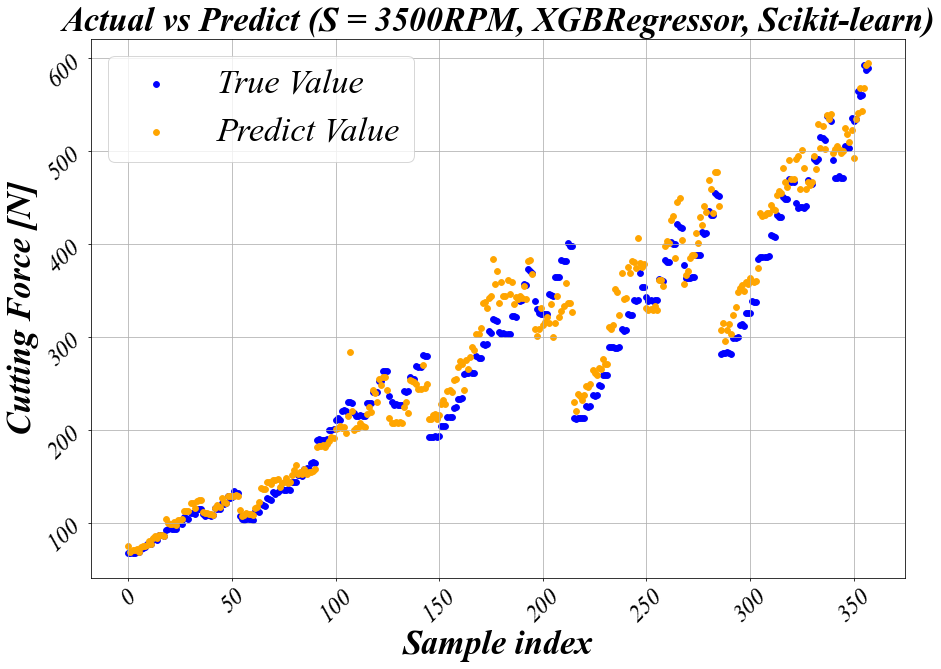

In [25]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Actual vs Predict (S = 3500RPM, XGBRegressor, Scikit-learn)',**tfont)
plt.scatter(range(0, len(y_test)), y_test, label='True Value', color = 'blue')
#plt.ylim((0,300))
plt.scatter(range(0, len(XGB_test_pred)), XGB_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid()
plt.legend(fontsize = 35)
plt.show()
#fig.savefig("Bi-directional LSTM Prediction.svg")

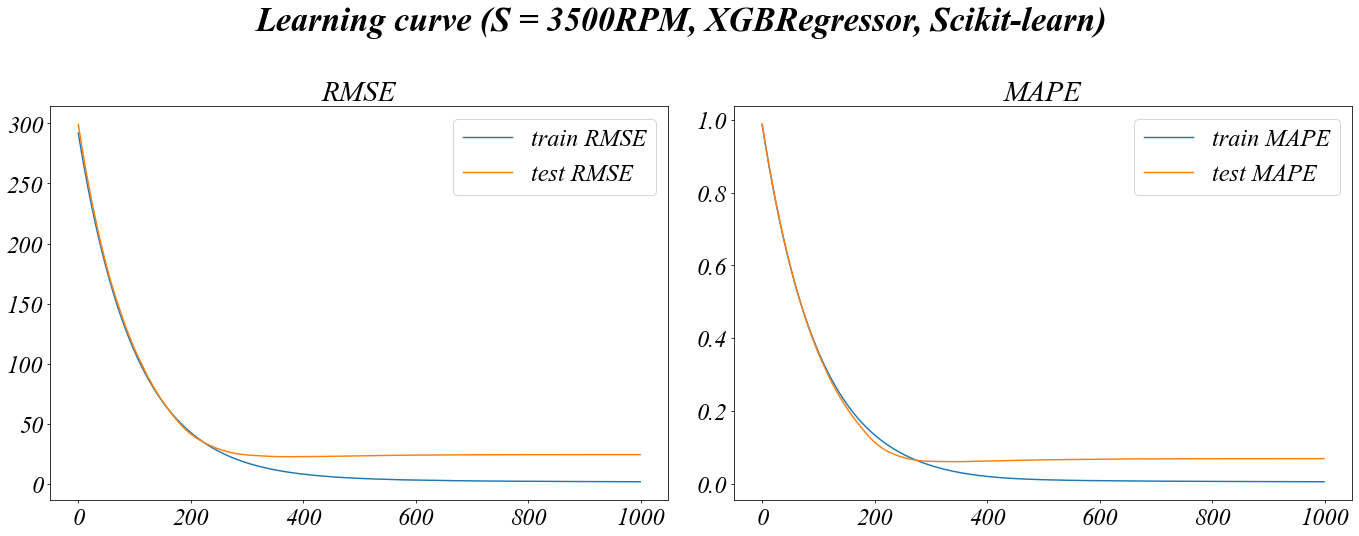

In [26]:
results = xgb.evals_result() # 학습 결과 가져오기


train_rmse = results['validation_0']['rmse']
test_rmse = results['validation_1']['rmse']

train_mape = results['validation_0']['mape']
test_mape = results['validation_1']['mape']

#학습곡선 그리기
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8),dpi=70)

ax[0].set_title("RMSE")
ax[1].set_title("MAPE")

ax[0].plot(train_rmse, label='train RMSE')
ax[0].plot(test_rmse, label='test RMSE')
ax[0].legend()

ax[1].plot(train_mape, label='train MAPE')
ax[1].plot(test_mape, label='test MAPE')
ax[1].legend()

fig.suptitle('Learning curve (S = 3500RPM, XGBRegressor, Scikit-learn)',**tfont)
fig.tight_layout() # 사용하면 플롯간 여백을 조정해준다. 
plt.show()
fig.savefig("./plot/Learning curve rpm 3500_12800.png")

# ***RPM 4000 test***

In [27]:
train = pd.concat([rpm_3000, rpm_3500, rpm_4500, rpm_5000], axis  = 0)
train = train.reset_index(drop=True)
X_train = train.iloc[: , 1:]
y_train = train['RMS_CF_max']

In [28]:
X_test = rpm_4000.iloc[: , 1:]
y_test = rpm_4000['RMS_CF_max']

In [29]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [30]:
xgb = XGBRegressor(learning_rate = 0.01,
                   n_estimators = 1000,
                   n_jobs  = -1,random_state=42)

eval_set = [(X_train_scaled, y_train), (X_test_scaled, y_test)] # 학습에 사용한 데이터셋과 검증에 사용한 데이터셋

xgb.fit(X_train_scaled, y_train,eval_set=eval_set, eval_metric=['rmse', 'mape'])

[0]	validation_0-rmse:293.75018	validation_0-mape:0.98754	validation_1-rmse:292.03068	validation_1-mape:0.98725
[1]	validation_0-rmse:290.87371	validation_0-mape:0.97765	validation_1-rmse:289.09434	validation_1-mape:0.97697
[2]	validation_0-rmse:288.02669	validation_0-mape:0.96786	validation_1-rmse:286.20280	validation_1-mape:0.96688
[3]	validation_0-rmse:285.20752	validation_0-mape:0.95817	validation_1-rmse:283.34867	validation_1-mape:0.95684
[4]	validation_0-rmse:282.41905	validation_0-mape:0.94858	validation_1-rmse:280.53513	validation_1-mape:0.94699
[5]	validation_0-rmse:279.65590	validation_0-mape:0.93908	validation_1-rmse:277.74730	validation_1-mape:0.93718
[6]	validation_0-rmse:276.92099	validation_0-mape:0.92968	validation_1-rmse:274.98852	validation_1-mape:0.92752
[7]	validation_0-rmse:274.21346	validation_0-mape:0.92038	validation_1-rmse:272.25175	validation_1-mape:0.91791
[8]	validation_0-rmse:271.53188	validation_0-mape:0.91116	validation_1-rmse:269.51743	validation_1-mape:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


[15]	validation_0-rmse:253.50568	validation_0-mape:0.84921	validation_1-rmse:251.24125	validation_1-mape:0.84407
[16]	validation_0-rmse:251.03120	validation_0-mape:0.84070	validation_1-rmse:248.73259	validation_1-mape:0.83527
[17]	validation_0-rmse:248.58280	validation_0-mape:0.83229	validation_1-rmse:246.26633	validation_1-mape:0.82662
[18]	validation_0-rmse:246.16053	validation_0-mape:0.82398	validation_1-rmse:243.80851	validation_1-mape:0.81796
[19]	validation_0-rmse:243.75942	validation_0-mape:0.81572	validation_1-rmse:241.38768	validation_1-mape:0.80946
[20]	validation_0-rmse:241.38293	validation_0-mape:0.80756	validation_1-rmse:238.97801	validation_1-mape:0.80105
[21]	validation_0-rmse:239.02949	validation_0-mape:0.79947	validation_1-rmse:236.65473	validation_1-mape:0.79284
[22]	validation_0-rmse:236.70078	validation_0-mape:0.79149	validation_1-rmse:234.32597	validation_1-mape:0.78458
[23]	validation_0-rmse:234.39466	validation_0-mape:0.78357	validation_1-rmse:231.98904	validatio

[88]	validation_0-rmse:124.48946	validation_0-mape:0.40833	validation_1-rmse:123.94156	validation_1-mape:0.39548
[89]	validation_0-rmse:123.28891	validation_0-mape:0.40427	validation_1-rmse:122.82287	validation_1-mape:0.39131
[90]	validation_0-rmse:122.10336	validation_0-mape:0.40024	validation_1-rmse:121.60493	validation_1-mape:0.38695
[91]	validation_0-rmse:120.92662	validation_0-mape:0.39626	validation_1-rmse:120.51212	validation_1-mape:0.38292
[92]	validation_0-rmse:119.76154	validation_0-mape:0.39233	validation_1-rmse:119.42983	validation_1-mape:0.37895
[93]	validation_0-rmse:118.60989	validation_0-mape:0.38844	validation_1-rmse:118.40685	validation_1-mape:0.37522
[94]	validation_0-rmse:117.46805	validation_0-mape:0.38458	validation_1-rmse:117.35047	validation_1-mape:0.37133
[95]	validation_0-rmse:116.33743	validation_0-mape:0.38076	validation_1-rmse:116.30374	validation_1-mape:0.36748
[96]	validation_0-rmse:115.21845	validation_0-mape:0.37698	validation_1-rmse:115.21199	validatio

[161]	validation_0-rmse:61.84021	validation_0-mape:0.19724	validation_1-rmse:65.66108	validation_1-mape:0.18274
[162]	validation_0-rmse:61.25456	validation_0-mape:0.19528	validation_1-rmse:65.12482	validation_1-mape:0.18087
[163]	validation_0-rmse:60.67794	validation_0-mape:0.19335	validation_1-rmse:64.55223	validation_1-mape:0.17896
[164]	validation_0-rmse:60.10404	validation_0-mape:0.19144	validation_1-rmse:64.01801	validation_1-mape:0.17714
[165]	validation_0-rmse:59.53575	validation_0-mape:0.18955	validation_1-rmse:63.49688	validation_1-mape:0.17536
[166]	validation_0-rmse:58.97573	validation_0-mape:0.18768	validation_1-rmse:63.06967	validation_1-mape:0.17386
[167]	validation_0-rmse:58.41874	validation_0-mape:0.18583	validation_1-rmse:62.56189	validation_1-mape:0.17216
[168]	validation_0-rmse:57.86937	validation_0-mape:0.18399	validation_1-rmse:62.10736	validation_1-mape:0.17057
[169]	validation_0-rmse:57.32325	validation_0-mape:0.18218	validation_1-rmse:61.60433	validation_1-mape:

[235]	validation_0-rmse:31.04925	validation_0-mape:0.09463	validation_1-rmse:40.54657	validation_1-mape:0.09743
[236]	validation_0-rmse:30.76963	validation_0-mape:0.09370	validation_1-rmse:40.30144	validation_1-mape:0.09676
[237]	validation_0-rmse:30.49099	validation_0-mape:0.09278	validation_1-rmse:40.09587	validation_1-mape:0.09618
[238]	validation_0-rmse:30.21818	validation_0-mape:0.09186	validation_1-rmse:39.92907	validation_1-mape:0.09564
[239]	validation_0-rmse:29.94612	validation_0-mape:0.09095	validation_1-rmse:39.75127	validation_1-mape:0.09508
[240]	validation_0-rmse:29.67893	validation_0-mape:0.09005	validation_1-rmse:39.56562	validation_1-mape:0.09452
[241]	validation_0-rmse:29.41344	validation_0-mape:0.08916	validation_1-rmse:39.33700	validation_1-mape:0.09390
[242]	validation_0-rmse:29.14980	validation_0-mape:0.08828	validation_1-rmse:39.16141	validation_1-mape:0.09336
[243]	validation_0-rmse:28.88729	validation_0-mape:0.08742	validation_1-rmse:38.97534	validation_1-mape:

[309]	validation_0-rmse:16.22885	validation_0-mape:0.04565	validation_1-rmse:30.90966	validation_1-mape:0.07207
[310]	validation_0-rmse:16.09618	validation_0-mape:0.04520	validation_1-rmse:30.83521	validation_1-mape:0.07190
[311]	validation_0-rmse:15.96165	validation_0-mape:0.04477	validation_1-rmse:30.75599	validation_1-mape:0.07174
[312]	validation_0-rmse:15.82995	validation_0-mape:0.04434	validation_1-rmse:30.69459	validation_1-mape:0.07163
[313]	validation_0-rmse:15.69812	validation_0-mape:0.04390	validation_1-rmse:30.63793	validation_1-mape:0.07151
[314]	validation_0-rmse:15.56773	validation_0-mape:0.04348	validation_1-rmse:30.55246	validation_1-mape:0.07136
[315]	validation_0-rmse:15.43968	validation_0-mape:0.04306	validation_1-rmse:30.48103	validation_1-mape:0.07122
[316]	validation_0-rmse:15.31200	validation_0-mape:0.04265	validation_1-rmse:30.40348	validation_1-mape:0.07109
[317]	validation_0-rmse:15.18650	validation_0-mape:0.04223	validation_1-rmse:30.33108	validation_1-mape:

[383]	validation_0-rmse:9.13957	validation_0-mape:0.02300	validation_1-rmse:27.55626	validation_1-mape:0.06649
[384]	validation_0-rmse:9.07354	validation_0-mape:0.02280	validation_1-rmse:27.53265	validation_1-mape:0.06644
[385]	validation_0-rmse:9.01057	validation_0-mape:0.02262	validation_1-rmse:27.50680	validation_1-mape:0.06642
[386]	validation_0-rmse:8.94723	validation_0-mape:0.02243	validation_1-rmse:27.48346	validation_1-mape:0.06638
[387]	validation_0-rmse:8.88515	validation_0-mape:0.02224	validation_1-rmse:27.45107	validation_1-mape:0.06635
[388]	validation_0-rmse:8.82414	validation_0-mape:0.02206	validation_1-rmse:27.42663	validation_1-mape:0.06632
[389]	validation_0-rmse:8.76378	validation_0-mape:0.02188	validation_1-rmse:27.39491	validation_1-mape:0.06629
[390]	validation_0-rmse:8.70182	validation_0-mape:0.02170	validation_1-rmse:27.37114	validation_1-mape:0.06625
[391]	validation_0-rmse:8.64212	validation_0-mape:0.02152	validation_1-rmse:27.34776	validation_1-mape:0.06622
[

[457]	validation_0-rmse:5.77348	validation_0-mape:0.01370	validation_1-rmse:26.28613	validation_1-mape:0.06498
[458]	validation_0-rmse:5.74320	validation_0-mape:0.01363	validation_1-rmse:26.26884	validation_1-mape:0.06494
[459]	validation_0-rmse:5.71265	validation_0-mape:0.01355	validation_1-rmse:26.26400	validation_1-mape:0.06492
[460]	validation_0-rmse:5.68235	validation_0-mape:0.01348	validation_1-rmse:26.25454	validation_1-mape:0.06491
[461]	validation_0-rmse:5.65332	validation_0-mape:0.01341	validation_1-rmse:26.24347	validation_1-mape:0.06489
[462]	validation_0-rmse:5.62378	validation_0-mape:0.01333	validation_1-rmse:26.23899	validation_1-mape:0.06487
[463]	validation_0-rmse:5.59532	validation_0-mape:0.01327	validation_1-rmse:26.20986	validation_1-mape:0.06484
[464]	validation_0-rmse:5.56702	validation_0-mape:0.01320	validation_1-rmse:26.19307	validation_1-mape:0.06481
[465]	validation_0-rmse:5.53900	validation_0-mape:0.01313	validation_1-rmse:26.18879	validation_1-mape:0.06481
[

[531]	validation_0-rmse:4.14395	validation_0-mape:0.01028	validation_1-rmse:25.64097	validation_1-mape:0.06430
[532]	validation_0-rmse:4.12906	validation_0-mape:0.01026	validation_1-rmse:25.63021	validation_1-mape:0.06429
[533]	validation_0-rmse:4.11446	validation_0-mape:0.01023	validation_1-rmse:25.61814	validation_1-mape:0.06427
[534]	validation_0-rmse:4.09994	validation_0-mape:0.01021	validation_1-rmse:25.61034	validation_1-mape:0.06426
[535]	validation_0-rmse:4.08657	validation_0-mape:0.01018	validation_1-rmse:25.61451	validation_1-mape:0.06426
[536]	validation_0-rmse:4.07269	validation_0-mape:0.01016	validation_1-rmse:25.60669	validation_1-mape:0.06425
[537]	validation_0-rmse:4.05808	validation_0-mape:0.01013	validation_1-rmse:25.60348	validation_1-mape:0.06425
[538]	validation_0-rmse:4.04396	validation_0-mape:0.01010	validation_1-rmse:25.59688	validation_1-mape:0.06424
[539]	validation_0-rmse:4.02781	validation_0-mape:0.01007	validation_1-rmse:25.59579	validation_1-mape:0.06424
[

[605]	validation_0-rmse:3.29596	validation_0-mape:0.00877	validation_1-rmse:25.33109	validation_1-mape:0.06411
[606]	validation_0-rmse:3.28647	validation_0-mape:0.00875	validation_1-rmse:25.32408	validation_1-mape:0.06412
[607]	validation_0-rmse:3.27668	validation_0-mape:0.00874	validation_1-rmse:25.32143	validation_1-mape:0.06411
[608]	validation_0-rmse:3.26719	validation_0-mape:0.00872	validation_1-rmse:25.31197	validation_1-mape:0.06411
[609]	validation_0-rmse:3.25760	validation_0-mape:0.00871	validation_1-rmse:25.30337	validation_1-mape:0.06410
[610]	validation_0-rmse:3.24814	validation_0-mape:0.00869	validation_1-rmse:25.30081	validation_1-mape:0.06410
[611]	validation_0-rmse:3.23861	validation_0-mape:0.00867	validation_1-rmse:25.29284	validation_1-mape:0.06410
[612]	validation_0-rmse:3.22921	validation_0-mape:0.00866	validation_1-rmse:25.29012	validation_1-mape:0.06409
[613]	validation_0-rmse:3.21920	validation_0-mape:0.00864	validation_1-rmse:25.27402	validation_1-mape:0.06406
[

[679]	validation_0-rmse:2.73693	validation_0-mape:0.00773	validation_1-rmse:25.06142	validation_1-mape:0.06392
[680]	validation_0-rmse:2.73249	validation_0-mape:0.00772	validation_1-rmse:25.06552	validation_1-mape:0.06393
[681]	validation_0-rmse:2.72807	validation_0-mape:0.00771	validation_1-rmse:25.06979	validation_1-mape:0.06395
[682]	validation_0-rmse:2.72349	validation_0-mape:0.00771	validation_1-rmse:25.06749	validation_1-mape:0.06394
[683]	validation_0-rmse:2.71805	validation_0-mape:0.00769	validation_1-rmse:25.06462	validation_1-mape:0.06394
[684]	validation_0-rmse:2.71415	validation_0-mape:0.00769	validation_1-rmse:25.06170	validation_1-mape:0.06394
[685]	validation_0-rmse:2.70929	validation_0-mape:0.00768	validation_1-rmse:25.06105	validation_1-mape:0.06394
[686]	validation_0-rmse:2.70267	validation_0-mape:0.00766	validation_1-rmse:25.05983	validation_1-mape:0.06394
[687]	validation_0-rmse:2.69803	validation_0-mape:0.00765	validation_1-rmse:25.06209	validation_1-mape:0.06394
[

[753]	validation_0-rmse:2.39123	validation_0-mape:0.00697	validation_1-rmse:24.98372	validation_1-mape:0.06388
[754]	validation_0-rmse:2.38733	validation_0-mape:0.00696	validation_1-rmse:24.98302	validation_1-mape:0.06388
[755]	validation_0-rmse:2.38280	validation_0-mape:0.00695	validation_1-rmse:24.98130	validation_1-mape:0.06388
[756]	validation_0-rmse:2.37852	validation_0-mape:0.00694	validation_1-rmse:24.98017	validation_1-mape:0.06388
[757]	validation_0-rmse:2.37466	validation_0-mape:0.00693	validation_1-rmse:24.97882	validation_1-mape:0.06387
[758]	validation_0-rmse:2.37117	validation_0-mape:0.00692	validation_1-rmse:24.97804	validation_1-mape:0.06387
[759]	validation_0-rmse:2.36566	validation_0-mape:0.00691	validation_1-rmse:24.97893	validation_1-mape:0.06388
[760]	validation_0-rmse:2.36148	validation_0-mape:0.00690	validation_1-rmse:24.97783	validation_1-mape:0.06388
[761]	validation_0-rmse:2.35745	validation_0-mape:0.00689	validation_1-rmse:24.97696	validation_1-mape:0.06388
[

[827]	validation_0-rmse:2.12120	validation_0-mape:0.00633	validation_1-rmse:24.95208	validation_1-mape:0.06382
[828]	validation_0-rmse:2.11864	validation_0-mape:0.00633	validation_1-rmse:24.95156	validation_1-mape:0.06382
[829]	validation_0-rmse:2.11611	validation_0-mape:0.00632	validation_1-rmse:24.95193	validation_1-mape:0.06382
[830]	validation_0-rmse:2.11351	validation_0-mape:0.00631	validation_1-rmse:24.95136	validation_1-mape:0.06382
[831]	validation_0-rmse:2.11070	validation_0-mape:0.00631	validation_1-rmse:24.95118	validation_1-mape:0.06383
[832]	validation_0-rmse:2.10833	validation_0-mape:0.00630	validation_1-rmse:24.95066	validation_1-mape:0.06383
[833]	validation_0-rmse:2.10462	validation_0-mape:0.00629	validation_1-rmse:24.95086	validation_1-mape:0.06383
[834]	validation_0-rmse:2.10296	validation_0-mape:0.00629	validation_1-rmse:24.95340	validation_1-mape:0.06383
[835]	validation_0-rmse:2.10021	validation_0-mape:0.00628	validation_1-rmse:24.95328	validation_1-mape:0.06383
[

[901]	validation_0-rmse:1.91482	validation_0-mape:0.00582	validation_1-rmse:24.97301	validation_1-mape:0.06398
[902]	validation_0-rmse:1.91077	validation_0-mape:0.00581	validation_1-rmse:24.97453	validation_1-mape:0.06399
[903]	validation_0-rmse:1.90884	validation_0-mape:0.00580	validation_1-rmse:24.97593	validation_1-mape:0.06400
[904]	validation_0-rmse:1.90737	validation_0-mape:0.00580	validation_1-rmse:24.97572	validation_1-mape:0.06400
[905]	validation_0-rmse:1.90571	validation_0-mape:0.00580	validation_1-rmse:24.97538	validation_1-mape:0.06399
[906]	validation_0-rmse:1.90312	validation_0-mape:0.00579	validation_1-rmse:24.97415	validation_1-mape:0.06399
[907]	validation_0-rmse:1.89911	validation_0-mape:0.00578	validation_1-rmse:24.97571	validation_1-mape:0.06400
[908]	validation_0-rmse:1.89720	validation_0-mape:0.00578	validation_1-rmse:24.98103	validation_1-mape:0.06401
[909]	validation_0-rmse:1.89492	validation_0-mape:0.00577	validation_1-rmse:24.97948	validation_1-mape:0.06401
[

[975]	validation_0-rmse:1.76794	validation_0-mape:0.00545	validation_1-rmse:24.97340	validation_1-mape:0.06404
[976]	validation_0-rmse:1.76676	validation_0-mape:0.00545	validation_1-rmse:24.97316	validation_1-mape:0.06404
[977]	validation_0-rmse:1.76569	validation_0-mape:0.00545	validation_1-rmse:24.97442	validation_1-mape:0.06404
[978]	validation_0-rmse:1.76405	validation_0-mape:0.00544	validation_1-rmse:24.97400	validation_1-mape:0.06403
[979]	validation_0-rmse:1.76299	validation_0-mape:0.00544	validation_1-rmse:24.97525	validation_1-mape:0.06404
[980]	validation_0-rmse:1.76082	validation_0-mape:0.00543	validation_1-rmse:24.97421	validation_1-mape:0.06404
[981]	validation_0-rmse:1.75888	validation_0-mape:0.00543	validation_1-rmse:24.97382	validation_1-mape:0.06403
[982]	validation_0-rmse:1.75730	validation_0-mape:0.00542	validation_1-rmse:24.97375	validation_1-mape:0.06403
[983]	validation_0-rmse:1.75526	validation_0-mape:0.00542	validation_1-rmse:24.97427	validation_1-mape:0.06403
[

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [31]:
XGB_train_pred = xgb.predict(X_train_scaled)
XGB_test_pred = xgb.predict(X_test_scaled)

print('Train RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_train, XGB_train_pred))))
print('Train MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_train, XGB_train_pred)))

print('Test RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_test, XGB_test_pred))))
print('Test MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_test, XGB_test_pred)))

Train RMSE: 1.7275
Train MAPE: 0.5346
Test RMSE: 24.9798
Test MAPE: 6.4039


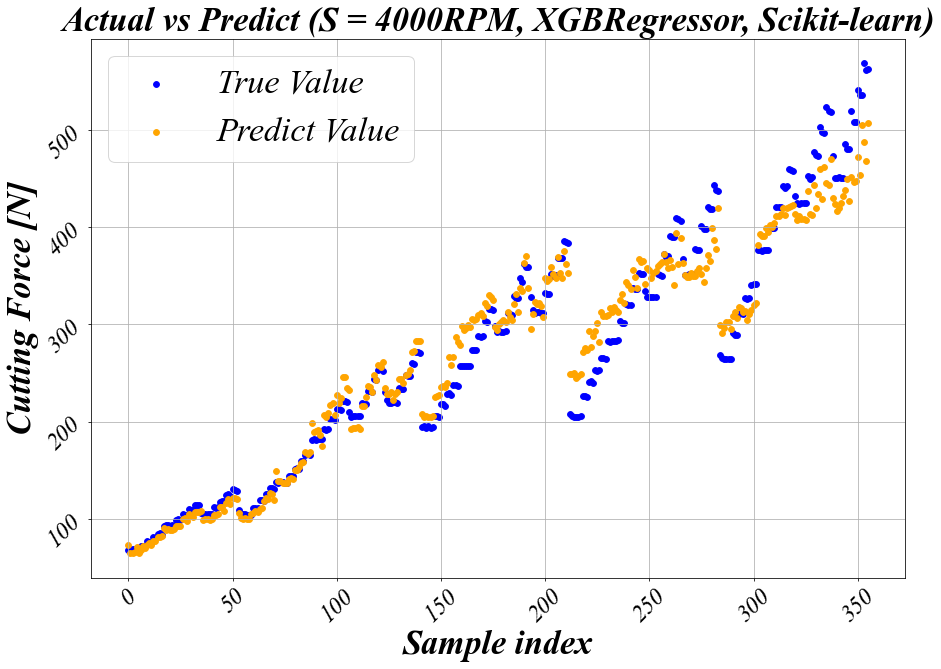

In [32]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Actual vs Predict (S = 4000RPM, XGBRegressor, Scikit-learn)',**tfont)
plt.scatter(range(0, len(y_test)), y_test, label='True Value', color = 'blue')
#plt.ylim((0,300))
plt.scatter(range(0, len(XGB_test_pred)), XGB_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid()
plt.legend(fontsize = 35)
plt.show()
#fig.savefig("Bi-directional LSTM Prediction.svg")

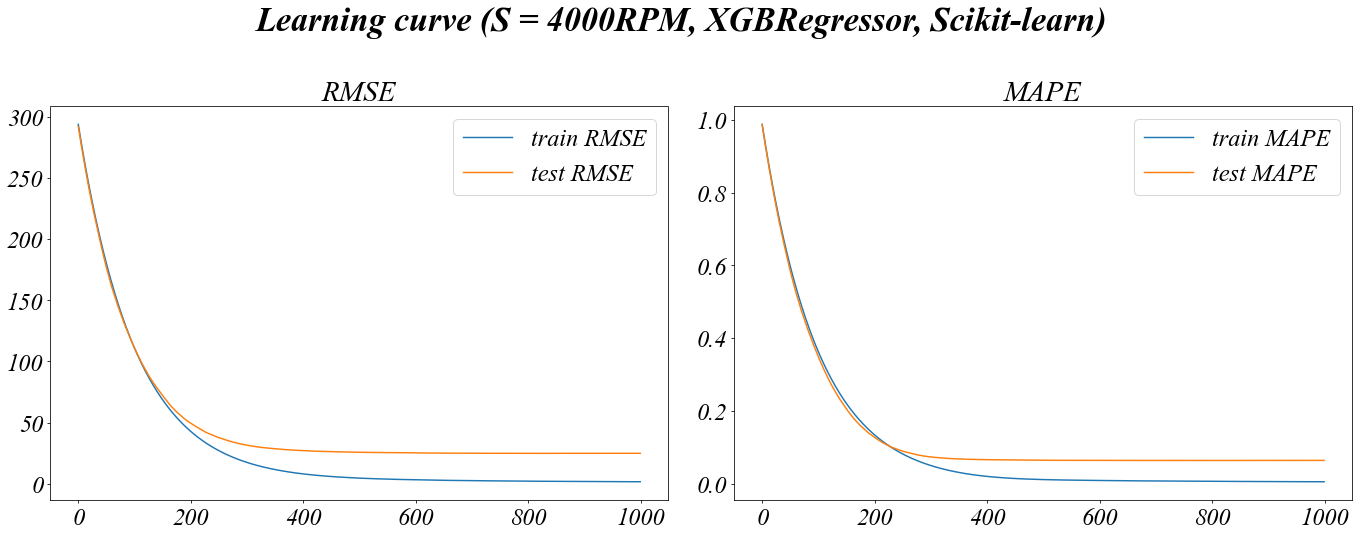

In [33]:
results = xgb.evals_result() # 학습 결과 가져오기


train_rmse = results['validation_0']['rmse']
test_rmse = results['validation_1']['rmse']

train_mape = results['validation_0']['mape']
test_mape = results['validation_1']['mape']

#학습곡선 그리기
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8),dpi=70)

ax[0].set_title("RMSE")
ax[1].set_title("MAPE")

ax[0].plot(train_rmse, label='train RMSE')
ax[0].plot(test_rmse, label='test RMSE')
ax[0].legend()

ax[1].plot(train_mape, label='train MAPE')
ax[1].plot(test_mape, label='test MAPE')
ax[1].legend()

fig.suptitle('Learning curve (S = 4000RPM, XGBRegressor, Scikit-learn)',**tfont)
fig.tight_layout() # 사용하면 플롯간 여백을 조정해준다. 
plt.show()
fig.savefig("./plot/Learning curve rpm 4000_12800.png")

# ***RPM 4500 test***

In [34]:
train = pd.concat([rpm_3000, rpm_3500, rpm_4000, rpm_5000], axis  = 0)
train = train.reset_index(drop=True)
X_train = train.iloc[: , 1:]
y_train = train['RMS_CF_max']

In [35]:
X_test = rpm_4500.iloc[: , 1:]
y_test = rpm_4500['RMS_CF_max']

In [36]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [37]:
xgb = XGBRegressor(learning_rate = 0.01,
                   n_estimators = 1000,
                   n_jobs  = -1,random_state=42)

eval_set = [(X_train_scaled, y_train), (X_test_scaled, y_test)] # 학습에 사용한 데이터셋과 검증에 사용한 데이터셋

xgb.fit(X_train_scaled, y_train,eval_set=eval_set, eval_metric=['rmse', 'mape'])

[0]	validation_0-rmse:296.70781	validation_0-mape:0.98758	validation_1-rmse:279.49164	validation_1-mape:0.98568
[1]	validation_0-rmse:293.79859	validation_0-mape:0.97771	validation_1-rmse:276.18512	validation_1-mape:0.97405
[2]	validation_0-rmse:290.91846	validation_0-mape:0.96794	validation_1-rmse:272.91376	validation_1-mape:0.96254
[3]	validation_0-rmse:288.06716	validation_0-mape:0.95827	validation_1-rmse:269.67388	validation_1-mape:0.95114
[4]	validation_0-rmse:285.24433	validation_0-mape:0.94869	validation_1-rmse:266.46859	validation_1-mape:0.93986
[5]	validation_0-rmse:282.44977	validation_0-mape:0.93921	validation_1-rmse:263.45707	validation_1-mape:0.92893
[6]	validation_0-rmse:279.68307	validation_0-mape:0.92982	validation_1-rmse:260.31613	validation_1-mape:0.91787
[7]	validation_0-rmse:276.94407	validation_0-mape:0.92052	validation_1-rmse:257.36299	validation_1-mape:0.90716
[8]	validation_0-rmse:274.23241	validation_0-mape:0.91132	validation_1-rmse:254.28517	validation_1-mape:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


[17]	validation_0-rmse:251.01504	validation_0-mape:0.83255	validation_1-rmse:228.91417	validation_1-mape:0.80504
[18]	validation_0-rmse:248.56127	validation_0-mape:0.82423	validation_1-rmse:226.25881	validation_1-mape:0.79542
[19]	validation_0-rmse:246.13282	validation_0-mape:0.81600	validation_1-rmse:223.68973	validation_1-mape:0.78609
[20]	validation_0-rmse:243.72844	validation_0-mape:0.80785	validation_1-rmse:221.13887	validation_1-mape:0.77678
[21]	validation_0-rmse:241.34713	validation_0-mape:0.79977	validation_1-rmse:218.56175	validation_1-mape:0.76744
[22]	validation_0-rmse:238.99059	validation_0-mape:0.79179	validation_1-rmse:216.08902	validation_1-mape:0.75846
[23]	validation_0-rmse:236.65627	validation_0-mape:0.78388	validation_1-rmse:213.37210	validation_1-mape:0.74891
[24]	validation_0-rmse:234.34518	validation_0-mape:0.77604	validation_1-rmse:210.87660	validation_1-mape:0.73984
[25]	validation_0-rmse:232.05731	validation_0-mape:0.76830	validation_1-rmse:208.24132	validatio

[90]	validation_0-rmse:123.12528	validation_0-mape:0.40041	validation_1-rmse:90.71082	validation_1-mape:0.30680
[91]	validation_0-rmse:121.93967	validation_0-mape:0.39642	validation_1-rmse:89.42392	validation_1-mape:0.30219
[92]	validation_0-rmse:120.76220	validation_0-mape:0.39249	validation_1-rmse:88.25056	validation_1-mape:0.29790
[93]	validation_0-rmse:119.59688	validation_0-mape:0.38858	validation_1-rmse:86.94221	validation_1-mape:0.29333
[94]	validation_0-rmse:118.44273	validation_0-mape:0.38471	validation_1-rmse:85.79270	validation_1-mape:0.28904
[95]	validation_0-rmse:117.30044	validation_0-mape:0.38088	validation_1-rmse:84.51558	validation_1-mape:0.28459
[96]	validation_0-rmse:116.16921	validation_0-mape:0.37709	validation_1-rmse:83.42015	validation_1-mape:0.28049
[97]	validation_0-rmse:115.04992	validation_0-mape:0.37333	validation_1-rmse:82.17321	validation_1-mape:0.27617
[98]	validation_0-rmse:113.94062	validation_0-mape:0.36962	validation_1-rmse:81.08009	validation_1-mape:

[164]	validation_0-rmse:60.43074	validation_0-mape:0.19145	validation_1-rmse:31.89026	validation_1-mape:0.09652
[165]	validation_0-rmse:59.85846	validation_0-mape:0.18956	validation_1-rmse:31.55625	validation_1-mape:0.09532
[166]	validation_0-rmse:59.29230	validation_0-mape:0.18768	validation_1-rmse:31.22026	validation_1-mape:0.09420
[167]	validation_0-rmse:58.73151	validation_0-mape:0.18582	validation_1-rmse:30.91005	validation_1-mape:0.09309
[168]	validation_0-rmse:58.17634	validation_0-mape:0.18398	validation_1-rmse:30.61119	validation_1-mape:0.09200
[169]	validation_0-rmse:57.62623	validation_0-mape:0.18216	validation_1-rmse:30.31754	validation_1-mape:0.09094
[170]	validation_0-rmse:57.08184	validation_0-mape:0.18036	validation_1-rmse:30.02119	validation_1-mape:0.08988
[171]	validation_0-rmse:56.54301	validation_0-mape:0.17858	validation_1-rmse:29.75865	validation_1-mape:0.08890
[172]	validation_0-rmse:56.00992	validation_0-mape:0.17681	validation_1-rmse:29.52824	validation_1-mape:

[238]	validation_0-rmse:30.28900	validation_0-mape:0.09180	validation_1-rmse:30.65700	validation_1-mape:0.08022
[239]	validation_0-rmse:30.01399	validation_0-mape:0.09090	validation_1-rmse:30.82015	validation_1-mape:0.08058
[240]	validation_0-rmse:29.74288	validation_0-mape:0.09000	validation_1-rmse:30.96663	validation_1-mape:0.08092
[241]	validation_0-rmse:29.47459	validation_0-mape:0.08911	validation_1-rmse:31.11354	validation_1-mape:0.08127
[242]	validation_0-rmse:29.20802	validation_0-mape:0.08823	validation_1-rmse:31.24707	validation_1-mape:0.08155
[243]	validation_0-rmse:28.94421	validation_0-mape:0.08735	validation_1-rmse:31.40973	validation_1-mape:0.08196
[244]	validation_0-rmse:28.68243	validation_0-mape:0.08649	validation_1-rmse:31.56647	validation_1-mape:0.08231
[245]	validation_0-rmse:28.42398	validation_0-mape:0.08563	validation_1-rmse:31.72291	validation_1-mape:0.08266
[246]	validation_0-rmse:28.16643	validation_0-mape:0.08478	validation_1-rmse:31.83758	validation_1-mape:

[312]	validation_0-rmse:15.78769	validation_0-mape:0.04416	validation_1-rmse:40.34665	validation_1-mape:0.10574
[313]	validation_0-rmse:15.65448	validation_0-mape:0.04373	validation_1-rmse:40.44388	validation_1-mape:0.10603
[314]	validation_0-rmse:15.52471	validation_0-mape:0.04330	validation_1-rmse:40.54141	validation_1-mape:0.10632
[315]	validation_0-rmse:15.39469	validation_0-mape:0.04288	validation_1-rmse:40.64229	validation_1-mape:0.10665
[316]	validation_0-rmse:15.26537	validation_0-mape:0.04247	validation_1-rmse:40.72250	validation_1-mape:0.10692
[317]	validation_0-rmse:15.13729	validation_0-mape:0.04206	validation_1-rmse:40.81830	validation_1-mape:0.10719
[318]	validation_0-rmse:15.01112	validation_0-mape:0.04165	validation_1-rmse:40.91171	validation_1-mape:0.10747
[319]	validation_0-rmse:14.88624	validation_0-mape:0.04124	validation_1-rmse:40.99504	validation_1-mape:0.10778
[320]	validation_0-rmse:14.76265	validation_0-mape:0.04085	validation_1-rmse:41.08710	validation_1-mape:

[386]	validation_0-rmse:8.79734	validation_0-mape:0.02230	validation_1-rmse:45.72452	validation_1-mape:0.12314
[387]	validation_0-rmse:8.73466	validation_0-mape:0.02211	validation_1-rmse:45.79331	validation_1-mape:0.12335
[388]	validation_0-rmse:8.67103	validation_0-mape:0.02193	validation_1-rmse:45.83504	validation_1-mape:0.12349
[389]	validation_0-rmse:8.60811	validation_0-mape:0.02174	validation_1-rmse:45.87361	validation_1-mape:0.12362
[390]	validation_0-rmse:8.54766	validation_0-mape:0.02157	validation_1-rmse:45.93969	validation_1-mape:0.12382
[391]	validation_0-rmse:8.48722	validation_0-mape:0.02139	validation_1-rmse:46.00774	validation_1-mape:0.12404
[392]	validation_0-rmse:8.42630	validation_0-mape:0.02122	validation_1-rmse:46.05022	validation_1-mape:0.12418
[393]	validation_0-rmse:8.36781	validation_0-mape:0.02105	validation_1-rmse:46.11321	validation_1-mape:0.12437
[394]	validation_0-rmse:8.30987	validation_0-mape:0.02088	validation_1-rmse:46.17600	validation_1-mape:0.12456
[

[460]	validation_0-rmse:5.50657	validation_0-mape:0.01335	validation_1-rmse:48.66679	validation_1-mape:0.13305
[461]	validation_0-rmse:5.47489	validation_0-mape:0.01328	validation_1-rmse:48.68343	validation_1-mape:0.13314
[462]	validation_0-rmse:5.44362	validation_0-mape:0.01320	validation_1-rmse:48.70387	validation_1-mape:0.13324
[463]	validation_0-rmse:5.41268	validation_0-mape:0.01313	validation_1-rmse:48.72818	validation_1-mape:0.13337
[464]	validation_0-rmse:5.38269	validation_0-mape:0.01306	validation_1-rmse:48.74774	validation_1-mape:0.13345
[465]	validation_0-rmse:5.35266	validation_0-mape:0.01299	validation_1-rmse:48.76807	validation_1-mape:0.13352
[466]	validation_0-rmse:5.32272	validation_0-mape:0.01292	validation_1-rmse:48.78973	validation_1-mape:0.13363
[467]	validation_0-rmse:5.29296	validation_0-mape:0.01285	validation_1-rmse:48.80953	validation_1-mape:0.13370
[468]	validation_0-rmse:5.26360	validation_0-mape:0.01279	validation_1-rmse:48.82503	validation_1-mape:0.13379
[

[534]	validation_0-rmse:3.87113	validation_0-mape:0.00982	validation_1-rmse:49.69010	validation_1-mape:0.13753
[535]	validation_0-rmse:3.85717	validation_0-mape:0.00980	validation_1-rmse:49.69965	validation_1-mape:0.13757
[536]	validation_0-rmse:3.84265	validation_0-mape:0.00977	validation_1-rmse:49.71792	validation_1-mape:0.13763
[537]	validation_0-rmse:3.82934	validation_0-mape:0.00974	validation_1-rmse:49.73272	validation_1-mape:0.13768
[538]	validation_0-rmse:3.81399	validation_0-mape:0.00971	validation_1-rmse:49.73823	validation_1-mape:0.13772
[539]	validation_0-rmse:3.79956	validation_0-mape:0.00968	validation_1-rmse:49.75647	validation_1-mape:0.13777
[540]	validation_0-rmse:3.78483	validation_0-mape:0.00966	validation_1-rmse:49.76564	validation_1-mape:0.13781
[541]	validation_0-rmse:3.76988	validation_0-mape:0.00963	validation_1-rmse:49.76961	validation_1-mape:0.13783
[542]	validation_0-rmse:3.75541	validation_0-mape:0.00960	validation_1-rmse:49.77969	validation_1-mape:0.13788
[

[608]	validation_0-rmse:3.09422	validation_0-mape:0.00828	validation_1-rmse:50.29423	validation_1-mape:0.14006
[609]	validation_0-rmse:3.08621	validation_0-mape:0.00826	validation_1-rmse:50.30179	validation_1-mape:0.14008
[610]	validation_0-rmse:3.07934	validation_0-mape:0.00825	validation_1-rmse:50.31005	validation_1-mape:0.14011
[611]	validation_0-rmse:3.07315	validation_0-mape:0.00824	validation_1-rmse:50.31590	validation_1-mape:0.14013
[612]	validation_0-rmse:3.06543	validation_0-mape:0.00823	validation_1-rmse:50.32157	validation_1-mape:0.14016
[613]	validation_0-rmse:3.05777	validation_0-mape:0.00821	validation_1-rmse:50.32983	validation_1-mape:0.14018
[614]	validation_0-rmse:3.05114	validation_0-mape:0.00820	validation_1-rmse:50.33608	validation_1-mape:0.14020
[615]	validation_0-rmse:3.04358	validation_0-mape:0.00819	validation_1-rmse:50.34323	validation_1-mape:0.14022
[616]	validation_0-rmse:3.03767	validation_0-mape:0.00818	validation_1-rmse:50.34884	validation_1-mape:0.14024
[

[682]	validation_0-rmse:2.73589	validation_0-mape:0.00760	validation_1-rmse:50.64186	validation_1-mape:0.14126
[683]	validation_0-rmse:2.73133	validation_0-mape:0.00760	validation_1-rmse:50.64595	validation_1-mape:0.14127
[684]	validation_0-rmse:2.72862	validation_0-mape:0.00759	validation_1-rmse:50.64885	validation_1-mape:0.14128
[685]	validation_0-rmse:2.72560	validation_0-mape:0.00758	validation_1-rmse:50.65390	validation_1-mape:0.14129
[686]	validation_0-rmse:2.72155	validation_0-mape:0.00757	validation_1-rmse:50.65829	validation_1-mape:0.14130
[687]	validation_0-rmse:2.71712	validation_0-mape:0.00757	validation_1-rmse:50.66222	validation_1-mape:0.14131
[688]	validation_0-rmse:2.71410	validation_0-mape:0.00756	validation_1-rmse:50.66746	validation_1-mape:0.14133
[689]	validation_0-rmse:2.71031	validation_0-mape:0.00755	validation_1-rmse:50.67270	validation_1-mape:0.14134
[690]	validation_0-rmse:2.70780	validation_0-mape:0.00755	validation_1-rmse:50.67510	validation_1-mape:0.14136
[

[756]	validation_0-rmse:2.52580	validation_0-mape:0.00715	validation_1-rmse:50.79305	validation_1-mape:0.14179
[757]	validation_0-rmse:2.52295	validation_0-mape:0.00715	validation_1-rmse:50.78590	validation_1-mape:0.14178
[758]	validation_0-rmse:2.52075	validation_0-mape:0.00714	validation_1-rmse:50.78784	validation_1-mape:0.14178
[759]	validation_0-rmse:2.51796	validation_0-mape:0.00714	validation_1-rmse:50.78099	validation_1-mape:0.14178
[760]	validation_0-rmse:2.51622	validation_0-mape:0.00713	validation_1-rmse:50.78258	validation_1-mape:0.14178
[761]	validation_0-rmse:2.51330	validation_0-mape:0.00713	validation_1-rmse:50.78097	validation_1-mape:0.14178
[762]	validation_0-rmse:2.51078	validation_0-mape:0.00712	validation_1-rmse:50.78209	validation_1-mape:0.14179
[763]	validation_0-rmse:2.50804	validation_0-mape:0.00712	validation_1-rmse:50.77483	validation_1-mape:0.14178
[764]	validation_0-rmse:2.50488	validation_0-mape:0.00711	validation_1-rmse:50.77470	validation_1-mape:0.14178
[

[830]	validation_0-rmse:2.29605	validation_0-mape:0.00662	validation_1-rmse:50.78099	validation_1-mape:0.14179
[831]	validation_0-rmse:2.29401	validation_0-mape:0.00662	validation_1-rmse:50.78200	validation_1-mape:0.14178
[832]	validation_0-rmse:2.29218	validation_0-mape:0.00661	validation_1-rmse:50.78244	validation_1-mape:0.14178
[833]	validation_0-rmse:2.28997	validation_0-mape:0.00661	validation_1-rmse:50.78511	validation_1-mape:0.14179
[834]	validation_0-rmse:2.28712	validation_0-mape:0.00660	validation_1-rmse:50.78259	validation_1-mape:0.14179
[835]	validation_0-rmse:2.28528	validation_0-mape:0.00660	validation_1-rmse:50.78607	validation_1-mape:0.14180
[836]	validation_0-rmse:2.28180	validation_0-mape:0.00659	validation_1-rmse:50.78737	validation_1-mape:0.14180
[837]	validation_0-rmse:2.27778	validation_0-mape:0.00658	validation_1-rmse:50.78832	validation_1-mape:0.14180
[838]	validation_0-rmse:2.27499	validation_0-mape:0.00657	validation_1-rmse:50.78568	validation_1-mape:0.14179
[

[904]	validation_0-rmse:2.15670	validation_0-mape:0.00628	validation_1-rmse:50.81224	validation_1-mape:0.14191
[905]	validation_0-rmse:2.15308	validation_0-mape:0.00628	validation_1-rmse:50.81430	validation_1-mape:0.14192
[906]	validation_0-rmse:2.15197	validation_0-mape:0.00627	validation_1-rmse:50.81077	validation_1-mape:0.14191
[907]	validation_0-rmse:2.15078	validation_0-mape:0.00627	validation_1-rmse:50.81086	validation_1-mape:0.14191
[908]	validation_0-rmse:2.14696	validation_0-mape:0.00626	validation_1-rmse:50.81162	validation_1-mape:0.14191
[909]	validation_0-rmse:2.14567	validation_0-mape:0.00626	validation_1-rmse:50.81067	validation_1-mape:0.14191
[910]	validation_0-rmse:2.14179	validation_0-mape:0.00625	validation_1-rmse:50.81114	validation_1-mape:0.14190
[911]	validation_0-rmse:2.14111	validation_0-mape:0.00625	validation_1-rmse:50.81125	validation_1-mape:0.14190
[912]	validation_0-rmse:2.13976	validation_0-mape:0.00624	validation_1-rmse:50.81031	validation_1-mape:0.14190
[

[978]	validation_0-rmse:2.03927	validation_0-mape:0.00599	validation_1-rmse:50.80617	validation_1-mape:0.14201
[979]	validation_0-rmse:2.03886	validation_0-mape:0.00599	validation_1-rmse:50.80614	validation_1-mape:0.14201
[980]	validation_0-rmse:2.03657	validation_0-mape:0.00598	validation_1-rmse:50.80672	validation_1-mape:0.14202
[981]	validation_0-rmse:2.03534	validation_0-mape:0.00598	validation_1-rmse:50.80744	validation_1-mape:0.14202
[982]	validation_0-rmse:2.03366	validation_0-mape:0.00598	validation_1-rmse:50.80829	validation_1-mape:0.14202
[983]	validation_0-rmse:2.03265	validation_0-mape:0.00597	validation_1-rmse:50.80908	validation_1-mape:0.14203
[984]	validation_0-rmse:2.03128	validation_0-mape:0.00597	validation_1-rmse:50.80978	validation_1-mape:0.14203
[985]	validation_0-rmse:2.02938	validation_0-mape:0.00597	validation_1-rmse:50.80910	validation_1-mape:0.14203
[986]	validation_0-rmse:2.02766	validation_0-mape:0.00596	validation_1-rmse:50.81001	validation_1-mape:0.14203
[

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [38]:
XGB_train_pred = xgb.predict(X_train_scaled)
XGB_test_pred = xgb.predict(X_test_scaled)

print('Train RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_train, XGB_train_pred))))
print('Train MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_train, XGB_train_pred)))

print('Test RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_test, XGB_test_pred))))
print('Test MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_test, XGB_test_pred)))

Train RMSE: 2.0109
Train MAPE: 0.5917
Test RMSE: 50.8093
Test MAPE: 14.2015


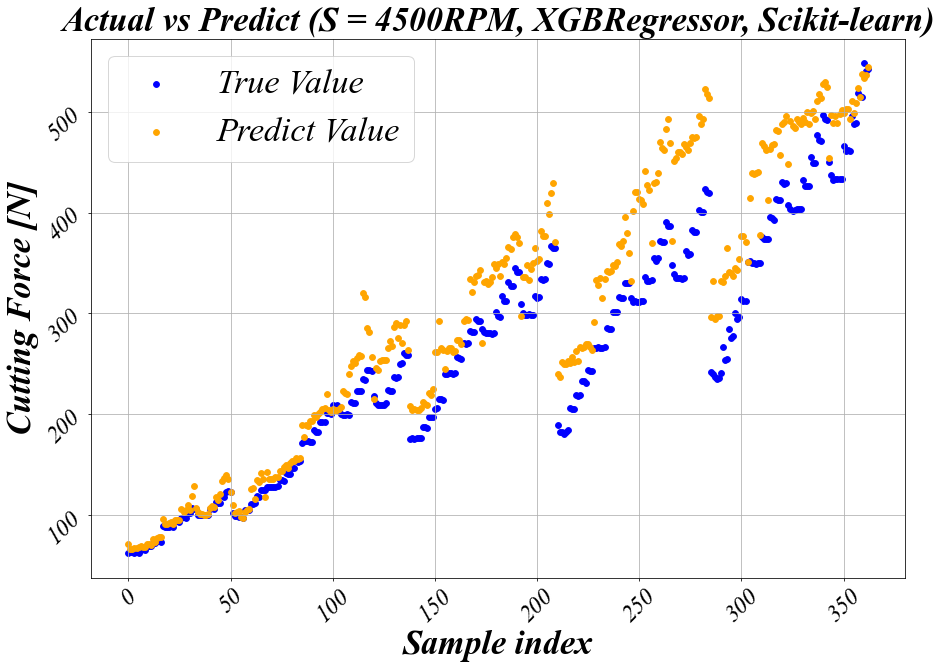

In [39]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Actual vs Predict (S = 4500RPM, XGBRegressor, Scikit-learn)',**tfont)
plt.scatter(range(0, len(y_test)), y_test, label='True Value', color = 'blue')
#plt.ylim((0,300))
plt.scatter(range(0, len(XGB_test_pred)), XGB_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid()
plt.legend(fontsize = 35)
plt.show()
#fig.savefig("Bi-directional LSTM Prediction.svg")

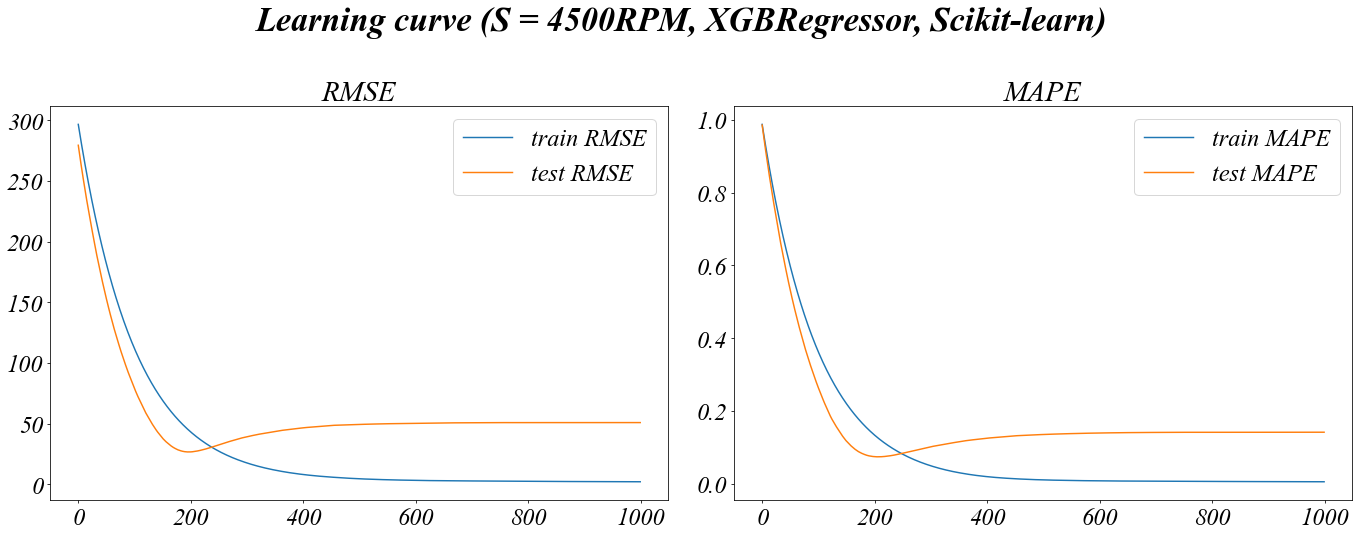

In [40]:
results = xgb.evals_result() # 학습 결과 가져오기


train_rmse = results['validation_0']['rmse']
test_rmse = results['validation_1']['rmse']

train_mape = results['validation_0']['mape']
test_mape = results['validation_1']['mape']

#학습곡선 그리기
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8),dpi=70)

ax[0].set_title("RMSE")
ax[1].set_title("MAPE")

ax[0].plot(train_rmse, label='train RMSE')
ax[0].plot(test_rmse, label='test RMSE')
ax[0].legend()

ax[1].plot(train_mape, label='train MAPE')
ax[1].plot(test_mape, label='test MAPE')
ax[1].legend()

fig.suptitle('Learning curve (S = 4500RPM, XGBRegressor, Scikit-learn)',**tfont)
fig.tight_layout() # 사용하면 플롯간 여백을 조정해준다. 
plt.show()
fig.savefig("./plot/Learning curve rpm 4500_12800.png")

# ***RPM 5000 test***

In [41]:
train = pd.concat([rpm_3000, rpm_3500, rpm_4000, rpm_4500], axis  = 0)
train = train.reset_index(drop=True)
X_train = train.iloc[: , 1:]
y_train = train['RMS_CF_max']

In [42]:
X_test = rpm_5000.iloc[: , 1:]
y_test = rpm_5000['RMS_CF_max']

In [43]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [44]:
xgb = XGBRegressor(learning_rate = 0.01,
                   n_estimators = 1000,
                   n_jobs  = -1,random_state=42)

eval_set = [(X_train_scaled, y_train), (X_test_scaled, y_test)] # 학습에 사용한 데이터셋과 검증에 사용한 데이터셋

xgb.fit(X_train_scaled, y_train,eval_set=eval_set, eval_metric=['rmse', 'mape'])

[0]	validation_0-rmse:298.67456	validation_0-mape:0.98758	validation_1-rmse:271.22034	validation_1-mape:0.98697
[1]	validation_0-rmse:295.74683	validation_0-mape:0.97771	validation_1-rmse:268.63446	validation_1-mape:0.97680
[2]	validation_0-rmse:292.85031	validation_0-mape:0.96792	validation_1-rmse:266.00784	validation_1-mape:0.96667
[3]	validation_0-rmse:289.98072	validation_0-mape:0.95824	validation_1-rmse:263.47420	validation_1-mape:0.95670
[4]	validation_0-rmse:287.14186	validation_0-mape:0.94864	validation_1-rmse:260.89979	validation_1-mape:0.94675
[5]	validation_0-rmse:284.32930	validation_0-mape:0.93915	validation_1-rmse:258.41763	validation_1-mape:0.93698
[6]	validation_0-rmse:281.54649	validation_0-mape:0.92974	validation_1-rmse:255.91440	validation_1-mape:0.92734
[7]	validation_0-rmse:278.78887	validation_0-mape:0.92044	validation_1-rmse:253.47575	validation_1-mape:0.91767
[8]	validation_0-rmse:276.05883	validation_0-mape:0.91123	validation_1-rmse:251.08316	validation_1-mape:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


[15]	validation_0-rmse:257.70012	validation_0-mape:0.84932	validation_1-rmse:234.74810	validation_1-mape:0.84446
[16]	validation_0-rmse:255.18343	validation_0-mape:0.84081	validation_1-rmse:232.46975	validation_1-mape:0.83567
[17]	validation_0-rmse:252.68959	validation_0-mape:0.83241	validation_1-rmse:230.29222	validation_1-mape:0.82712
[18]	validation_0-rmse:250.22029	validation_0-mape:0.82410	validation_1-rmse:228.17949	validation_1-mape:0.81869
[19]	validation_0-rmse:247.77619	validation_0-mape:0.81586	validation_1-rmse:226.00002	validation_1-mape:0.81028
[20]	validation_0-rmse:245.35666	validation_0-mape:0.80770	validation_1-rmse:223.81668	validation_1-mape:0.80183
[21]	validation_0-rmse:242.96011	validation_0-mape:0.79963	validation_1-rmse:221.81766	validation_1-mape:0.79377
[22]	validation_0-rmse:240.58839	validation_0-mape:0.79165	validation_1-rmse:219.76182	validation_1-mape:0.78570
[23]	validation_0-rmse:238.23998	validation_0-mape:0.78374	validation_1-rmse:217.71304	validatio

[88]	validation_0-rmse:126.35399	validation_0-mape:0.40855	validation_1-rmse:128.36680	validation_1-mape:0.41461
[89]	validation_0-rmse:125.13615	validation_0-mape:0.40448	validation_1-rmse:127.54780	validation_1-mape:0.41104
[90]	validation_0-rmse:123.92750	validation_0-mape:0.40045	validation_1-rmse:126.68564	validation_1-mape:0.40747
[91]	validation_0-rmse:122.73315	validation_0-mape:0.39647	validation_1-rmse:125.77000	validation_1-mape:0.40370
[92]	validation_0-rmse:121.54799	validation_0-mape:0.39251	validation_1-rmse:124.86267	validation_1-mape:0.40013
[93]	validation_0-rmse:120.37599	validation_0-mape:0.38860	validation_1-rmse:124.00824	validation_1-mape:0.39658
[94]	validation_0-rmse:119.21708	validation_0-mape:0.38473	validation_1-rmse:123.24710	validation_1-mape:0.39326
[95]	validation_0-rmse:118.06852	validation_0-mape:0.38089	validation_1-rmse:122.37642	validation_1-mape:0.38965
[96]	validation_0-rmse:116.92950	validation_0-mape:0.37711	validation_1-rmse:121.49827	validatio

[161]	validation_0-rmse:62.64014	validation_0-mape:0.19715	validation_1-rmse:83.74585	validation_1-mape:0.22956
[162]	validation_0-rmse:62.04637	validation_0-mape:0.19520	validation_1-rmse:83.30844	validation_1-mape:0.22784
[163]	validation_0-rmse:61.45801	validation_0-mape:0.19326	validation_1-rmse:82.91661	validation_1-mape:0.22619
[164]	validation_0-rmse:60.87618	validation_0-mape:0.19135	validation_1-rmse:82.49263	validation_1-mape:0.22452
[165]	validation_0-rmse:60.30134	validation_0-mape:0.18946	validation_1-rmse:82.10944	validation_1-mape:0.22300
[166]	validation_0-rmse:59.73136	validation_0-mape:0.18758	validation_1-rmse:81.73736	validation_1-mape:0.22142
[167]	validation_0-rmse:59.16702	validation_0-mape:0.18572	validation_1-rmse:81.38568	validation_1-mape:0.21983
[168]	validation_0-rmse:58.60805	validation_0-mape:0.18388	validation_1-rmse:81.04543	validation_1-mape:0.21834
[169]	validation_0-rmse:58.05444	validation_0-mape:0.18207	validation_1-rmse:80.64353	validation_1-mape:

[235]	validation_0-rmse:31.32609	validation_0-mape:0.09456	validation_1-rmse:62.27626	validation_1-mape:0.14395
[236]	validation_0-rmse:31.03909	validation_0-mape:0.09363	validation_1-rmse:62.06698	validation_1-mape:0.14319
[237]	validation_0-rmse:30.75335	validation_0-mape:0.09271	validation_1-rmse:61.83392	validation_1-mape:0.14243
[238]	validation_0-rmse:30.47213	validation_0-mape:0.09179	validation_1-rmse:61.63068	validation_1-mape:0.14169
[239]	validation_0-rmse:30.19396	validation_0-mape:0.09089	validation_1-rmse:61.39540	validation_1-mape:0.14081
[240]	validation_0-rmse:29.91812	validation_0-mape:0.08999	validation_1-rmse:61.17656	validation_1-mape:0.14007
[241]	validation_0-rmse:29.64717	validation_0-mape:0.08910	validation_1-rmse:61.00922	validation_1-mape:0.13942
[242]	validation_0-rmse:29.37513	validation_0-mape:0.08822	validation_1-rmse:60.78934	validation_1-mape:0.13866
[243]	validation_0-rmse:29.10769	validation_0-mape:0.08735	validation_1-rmse:60.60608	validation_1-mape:

[309]	validation_0-rmse:16.18138	validation_0-mape:0.04547	validation_1-rmse:50.79142	validation_1-mape:0.10401
[310]	validation_0-rmse:16.04314	validation_0-mape:0.04502	validation_1-rmse:50.63546	validation_1-mape:0.10360
[311]	validation_0-rmse:15.90802	validation_0-mape:0.04458	validation_1-rmse:50.49954	validation_1-mape:0.10326
[312]	validation_0-rmse:15.77128	validation_0-mape:0.04414	validation_1-rmse:50.41021	validation_1-mape:0.10295
[313]	validation_0-rmse:15.63708	validation_0-mape:0.04371	validation_1-rmse:50.25871	validation_1-mape:0.10251
[314]	validation_0-rmse:15.50310	validation_0-mape:0.04328	validation_1-rmse:50.17357	validation_1-mape:0.10222
[315]	validation_0-rmse:15.37002	validation_0-mape:0.04286	validation_1-rmse:50.08975	validation_1-mape:0.10194
[316]	validation_0-rmse:15.24219	validation_0-mape:0.04243	validation_1-rmse:50.01525	validation_1-mape:0.10166
[317]	validation_0-rmse:15.11568	validation_0-mape:0.04202	validation_1-rmse:49.94304	validation_1-mape:

[383]	validation_0-rmse:8.89920	validation_0-mape:0.02245	validation_1-rmse:45.13700	validation_1-mape:0.08780
[384]	validation_0-rmse:8.83344	validation_0-mape:0.02225	validation_1-rmse:45.11356	validation_1-mape:0.08771
[385]	validation_0-rmse:8.76808	validation_0-mape:0.02206	validation_1-rmse:45.08369	validation_1-mape:0.08762
[386]	validation_0-rmse:8.70266	validation_0-mape:0.02187	validation_1-rmse:45.00847	validation_1-mape:0.08745
[387]	validation_0-rmse:8.63893	validation_0-mape:0.02167	validation_1-rmse:44.98323	validation_1-mape:0.08737
[388]	validation_0-rmse:8.57476	validation_0-mape:0.02149	validation_1-rmse:44.91761	validation_1-mape:0.08723
[389]	validation_0-rmse:8.51155	validation_0-mape:0.02130	validation_1-rmse:44.89877	validation_1-mape:0.08717
[390]	validation_0-rmse:8.44906	validation_0-mape:0.02111	validation_1-rmse:44.87859	validation_1-mape:0.08710
[391]	validation_0-rmse:8.38674	validation_0-mape:0.02093	validation_1-rmse:44.81308	validation_1-mape:0.08696
[

[457]	validation_0-rmse:5.39853	validation_0-mape:0.01281	validation_1-rmse:41.95523	validation_1-mape:0.08085
[458]	validation_0-rmse:5.36570	validation_0-mape:0.01273	validation_1-rmse:41.90803	validation_1-mape:0.08078
[459]	validation_0-rmse:5.33292	validation_0-mape:0.01265	validation_1-rmse:41.88814	validation_1-mape:0.08073
[460]	validation_0-rmse:5.30064	validation_0-mape:0.01258	validation_1-rmse:41.85814	validation_1-mape:0.08065
[461]	validation_0-rmse:5.27058	validation_0-mape:0.01250	validation_1-rmse:41.84055	validation_1-mape:0.08061
[462]	validation_0-rmse:5.24140	validation_0-mape:0.01243	validation_1-rmse:41.81210	validation_1-mape:0.08055
[463]	validation_0-rmse:5.21067	validation_0-mape:0.01236	validation_1-rmse:41.79620	validation_1-mape:0.08051
[464]	validation_0-rmse:5.18216	validation_0-mape:0.01229	validation_1-rmse:41.76809	validation_1-mape:0.08044
[465]	validation_0-rmse:5.15185	validation_0-mape:0.01222	validation_1-rmse:41.75584	validation_1-mape:0.08042
[

[530]	validation_0-rmse:3.80931	validation_0-mape:0.00927	validation_1-rmse:40.73659	validation_1-mape:0.07823
[531]	validation_0-rmse:3.79417	validation_0-mape:0.00925	validation_1-rmse:40.72639	validation_1-mape:0.07820
[532]	validation_0-rmse:3.77891	validation_0-mape:0.00922	validation_1-rmse:40.71737	validation_1-mape:0.07819
[533]	validation_0-rmse:3.76530	validation_0-mape:0.00919	validation_1-rmse:40.70789	validation_1-mape:0.07817
[534]	validation_0-rmse:3.75036	validation_0-mape:0.00916	validation_1-rmse:40.69865	validation_1-mape:0.07815
[535]	validation_0-rmse:3.73575	validation_0-mape:0.00914	validation_1-rmse:40.68864	validation_1-mape:0.07814
[536]	validation_0-rmse:3.72259	validation_0-mape:0.00911	validation_1-rmse:40.67918	validation_1-mape:0.07811
[537]	validation_0-rmse:3.70962	validation_0-mape:0.00909	validation_1-rmse:40.67020	validation_1-mape:0.07810
[538]	validation_0-rmse:3.69547	validation_0-mape:0.00906	validation_1-rmse:40.65918	validation_1-mape:0.07808
[

[604]	validation_0-rmse:2.98462	validation_0-mape:0.00778	validation_1-rmse:40.23287	validation_1-mape:0.07713
[605]	validation_0-rmse:2.97557	validation_0-mape:0.00777	validation_1-rmse:40.23001	validation_1-mape:0.07713
[606]	validation_0-rmse:2.96619	validation_0-mape:0.00775	validation_1-rmse:40.22776	validation_1-mape:0.07712
[607]	validation_0-rmse:2.95816	validation_0-mape:0.00774	validation_1-rmse:40.22600	validation_1-mape:0.07712
[608]	validation_0-rmse:2.94994	validation_0-mape:0.00772	validation_1-rmse:40.22278	validation_1-mape:0.07711
[609]	validation_0-rmse:2.94289	validation_0-mape:0.00771	validation_1-rmse:40.21496	validation_1-mape:0.07710
[610]	validation_0-rmse:2.93290	validation_0-mape:0.00769	validation_1-rmse:40.21269	validation_1-mape:0.07709
[611]	validation_0-rmse:2.92430	validation_0-mape:0.00767	validation_1-rmse:40.20989	validation_1-mape:0.07709
[612]	validation_0-rmse:2.91458	validation_0-mape:0.00766	validation_1-rmse:40.20756	validation_1-mape:0.07707
[

[678]	validation_0-rmse:2.50245	validation_0-mape:0.00690	validation_1-rmse:40.01618	validation_1-mape:0.07661
[679]	validation_0-rmse:2.49694	validation_0-mape:0.00689	validation_1-rmse:40.00788	validation_1-mape:0.07659
[680]	validation_0-rmse:2.49255	validation_0-mape:0.00689	validation_1-rmse:40.00342	validation_1-mape:0.07658
[681]	validation_0-rmse:2.48858	validation_0-mape:0.00688	validation_1-rmse:40.00063	validation_1-mape:0.07657
[682]	validation_0-rmse:2.48424	validation_0-mape:0.00687	validation_1-rmse:39.99567	validation_1-mape:0.07657
[683]	validation_0-rmse:2.47939	validation_0-mape:0.00686	validation_1-rmse:39.98856	validation_1-mape:0.07655
[684]	validation_0-rmse:2.47386	validation_0-mape:0.00685	validation_1-rmse:39.98065	validation_1-mape:0.07653
[685]	validation_0-rmse:2.46989	validation_0-mape:0.00684	validation_1-rmse:39.96890	validation_1-mape:0.07650
[686]	validation_0-rmse:2.46652	validation_0-mape:0.00683	validation_1-rmse:39.96807	validation_1-mape:0.07650
[

[752]	validation_0-rmse:2.21691	validation_0-mape:0.00629	validation_1-rmse:39.77384	validation_1-mape:0.07613
[753]	validation_0-rmse:2.21364	validation_0-mape:0.00628	validation_1-rmse:39.76352	validation_1-mape:0.07611
[754]	validation_0-rmse:2.21122	validation_0-mape:0.00628	validation_1-rmse:39.76317	validation_1-mape:0.07611
[755]	validation_0-rmse:2.20744	validation_0-mape:0.00627	validation_1-rmse:39.76311	validation_1-mape:0.07611
[756]	validation_0-rmse:2.20409	validation_0-mape:0.00626	validation_1-rmse:39.75765	validation_1-mape:0.07610
[757]	validation_0-rmse:2.20142	validation_0-mape:0.00625	validation_1-rmse:39.74930	validation_1-mape:0.07608
[758]	validation_0-rmse:2.19898	validation_0-mape:0.00624	validation_1-rmse:39.74668	validation_1-mape:0.07607
[759]	validation_0-rmse:2.19585	validation_0-mape:0.00624	validation_1-rmse:39.74073	validation_1-mape:0.07605
[760]	validation_0-rmse:2.19324	validation_0-mape:0.00623	validation_1-rmse:39.73160	validation_1-mape:0.07603
[

[826]	validation_0-rmse:1.99806	validation_0-mape:0.00579	validation_1-rmse:39.59204	validation_1-mape:0.07561
[827]	validation_0-rmse:1.99613	validation_0-mape:0.00579	validation_1-rmse:39.58772	validation_1-mape:0.07560
[828]	validation_0-rmse:1.99323	validation_0-mape:0.00579	validation_1-rmse:39.58837	validation_1-mape:0.07560
[829]	validation_0-rmse:1.99184	validation_0-mape:0.00578	validation_1-rmse:39.58887	validation_1-mape:0.07560
[830]	validation_0-rmse:1.98967	validation_0-mape:0.00578	validation_1-rmse:39.58603	validation_1-mape:0.07559
[831]	validation_0-rmse:1.98774	validation_0-mape:0.00577	validation_1-rmse:39.58261	validation_1-mape:0.07559
[832]	validation_0-rmse:1.98586	validation_0-mape:0.00577	validation_1-rmse:39.58007	validation_1-mape:0.07558
[833]	validation_0-rmse:1.98441	validation_0-mape:0.00577	validation_1-rmse:39.57998	validation_1-mape:0.07558
[834]	validation_0-rmse:1.98179	validation_0-mape:0.00576	validation_1-rmse:39.57313	validation_1-mape:0.07557
[

[900]	validation_0-rmse:1.85421	validation_0-mape:0.00546	validation_1-rmse:39.50857	validation_1-mape:0.07541
[901]	validation_0-rmse:1.85286	validation_0-mape:0.00546	validation_1-rmse:39.50301	validation_1-mape:0.07540
[902]	validation_0-rmse:1.85059	validation_0-mape:0.00545	validation_1-rmse:39.50233	validation_1-mape:0.07540
[903]	validation_0-rmse:1.84881	validation_0-mape:0.00545	validation_1-rmse:39.50375	validation_1-mape:0.07540
[904]	validation_0-rmse:1.84722	validation_0-mape:0.00545	validation_1-rmse:39.50004	validation_1-mape:0.07539
[905]	validation_0-rmse:1.84478	validation_0-mape:0.00544	validation_1-rmse:39.49580	validation_1-mape:0.07538
[906]	validation_0-rmse:1.84315	validation_0-mape:0.00543	validation_1-rmse:39.49659	validation_1-mape:0.07538
[907]	validation_0-rmse:1.83964	validation_0-mape:0.00543	validation_1-rmse:39.49481	validation_1-mape:0.07538
[908]	validation_0-rmse:1.83742	validation_0-mape:0.00542	validation_1-rmse:39.48796	validation_1-mape:0.07536
[

[974]	validation_0-rmse:1.71408	validation_0-mape:0.00512	validation_1-rmse:39.47521	validation_1-mape:0.07528
[975]	validation_0-rmse:1.71293	validation_0-mape:0.00512	validation_1-rmse:39.47694	validation_1-mape:0.07528
[976]	validation_0-rmse:1.71057	validation_0-mape:0.00511	validation_1-rmse:39.47833	validation_1-mape:0.07528
[977]	validation_0-rmse:1.70878	validation_0-mape:0.00511	validation_1-rmse:39.47799	validation_1-mape:0.07528
[978]	validation_0-rmse:1.70728	validation_0-mape:0.00511	validation_1-rmse:39.47805	validation_1-mape:0.07528
[979]	validation_0-rmse:1.70615	validation_0-mape:0.00510	validation_1-rmse:39.47975	validation_1-mape:0.07528
[980]	validation_0-rmse:1.70432	validation_0-mape:0.00510	validation_1-rmse:39.47744	validation_1-mape:0.07528
[981]	validation_0-rmse:1.70133	validation_0-mape:0.00509	validation_1-rmse:39.47771	validation_1-mape:0.07528
[982]	validation_0-rmse:1.69959	validation_0-mape:0.00509	validation_1-rmse:39.47758	validation_1-mape:0.07528
[

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [45]:
XGB_train_pred = xgb.predict(X_train_scaled)
XGB_test_pred = xgb.predict(X_test_scaled)

print('Train RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_train, XGB_train_pred))))
print('Train MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_train, XGB_train_pred)))

print('Test RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_test, XGB_test_pred))))
print('Test MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_test, XGB_test_pred)))

Train RMSE: 1.6746
Train MAPE: 0.5020
Test RMSE: 39.4835
Test MAPE: 7.5285


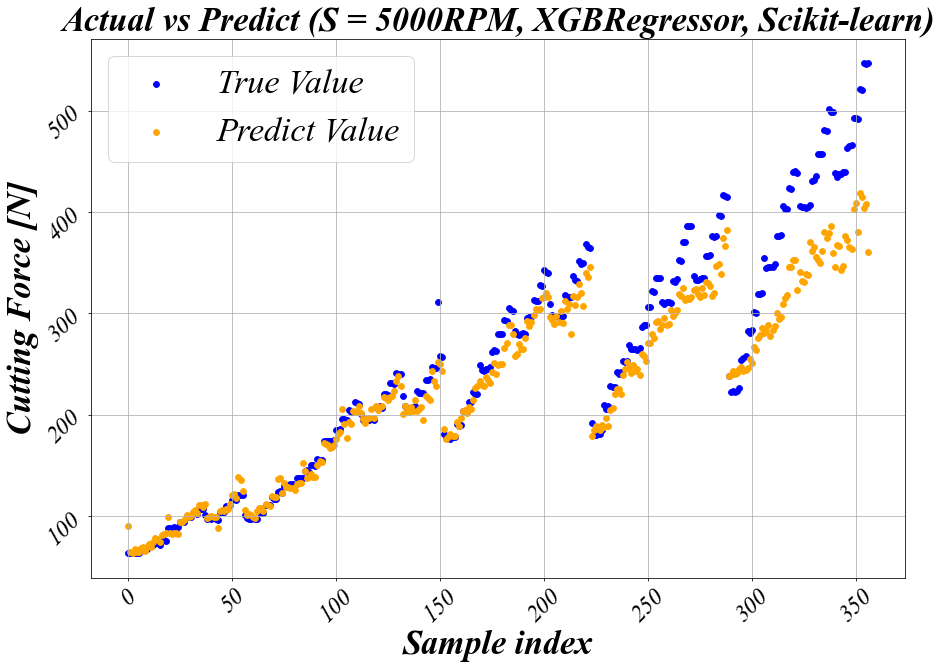

In [46]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Actual vs Predict (S = 5000RPM, XGBRegressor, Scikit-learn)',**tfont)
plt.scatter(range(0, len(y_test)), y_test, label='True Value', color = 'blue')
#plt.ylim((0,300))
plt.scatter(range(0, len(XGB_test_pred)), XGB_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid()
plt.legend(fontsize = 35)
plt.show()
#fig.savefig("Bi-directional LSTM Prediction.svg")

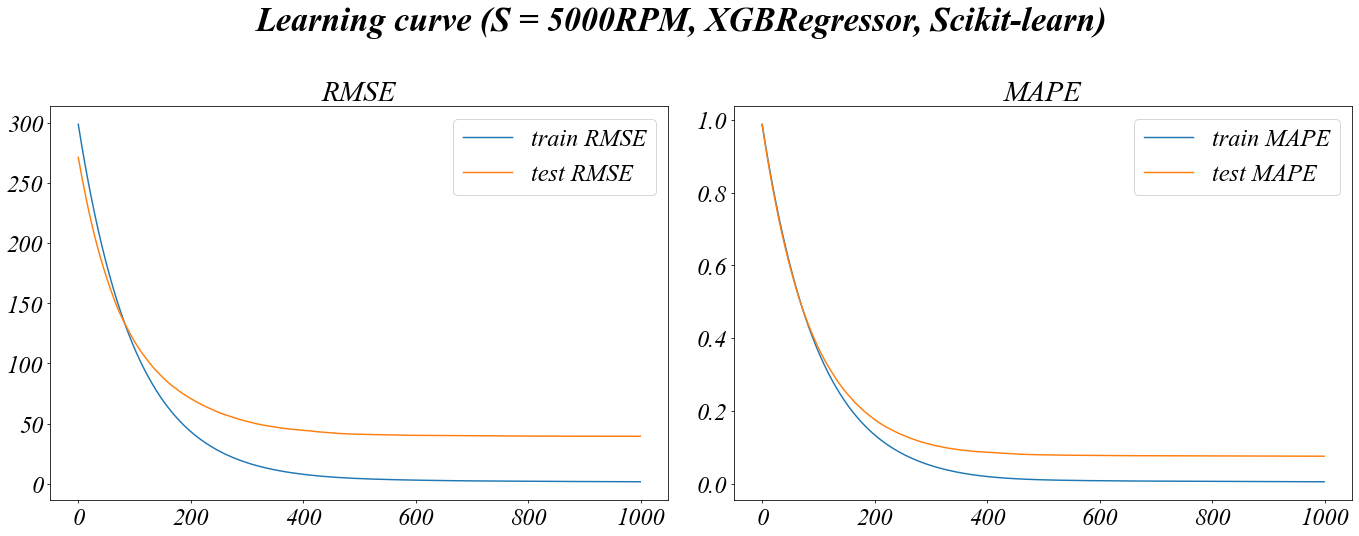

In [47]:
results = xgb.evals_result() # 학습 결과 가져오기


train_rmse = results['validation_0']['rmse']
test_rmse = results['validation_1']['rmse']

train_mape = results['validation_0']['mape']
test_mape = results['validation_1']['mape']

#학습곡선 그리기
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8),dpi=70)

ax[0].set_title("RMSE")
ax[1].set_title("MAPE")

ax[0].plot(train_rmse, label='train RMSE')
ax[0].plot(test_rmse, label='test RMSE')
ax[0].legend()

ax[1].plot(train_mape, label='train MAPE')
ax[1].plot(test_mape, label='test MAPE')
ax[1].legend()

fig.suptitle('Learning curve (S = 5000RPM, XGBRegressor, Scikit-learn)',**tfont)
fig.tight_layout() # 사용하면 플롯간 여백을 조정해준다. 
plt.show()
fig.savefig("./plot/Learning curve rpm 5000_12800.png")